### <span style = 'color:green'> Build a machine learning algorithm to predict the house prices by using ensemble techniques.   </span>

#### About the dataset

Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale


- **File descriptions**
- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here

**Ensemble Techniques**

- Bagging - Building multiple models (typically of the same type) from different subsamples of the training dataset.
- Boosting - Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.
- Voting - Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.




* Build Various ***ML Models*** with the view of ***increasing accuracy*** of the Model. 


1. Dicision trees regression

2. random forest regression 

3. ADA boost

4. Gradient Boosting with XGBoost




### To download the dataset <a href = 'https://drive.google.com/file/d/1rknDE31orIy3R214mzd4Wcrlbyw7LS2O/view?usp=sharing' title = 'Google Drive'> Click Here

### Importing libs

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind
import warnings
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2,f_classif,f_regression
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
# Suppress all warnings
warnings.filterwarnings("ignore")

### Data loading

In [117]:
df = pd.read_csv('train.csv')

In [118]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [120]:
pd.set_option('display.max_rows', None)
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [121]:
### deleting the columns which has more null values

total_rows = len(df)
null_counts=df.isnull().sum()
threshold_value=0.25*total_rows

# List columns with more than 100 null values
columns_to_remove = null_counts[null_counts > threshold_value].index.tolist()

# Remove columns with more than 100 null values
df.drop(columns=columns_to_remove, inplace=True)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
5        6          50       RL         85.0    14115   Pave      IR1   
6        7          20       RL         75.0    10084   Pave      Reg   
7        8          60       RL          NaN    10382   Pave      IR1   
8        9          50       RM         51.0     6120   Pave      Reg   
9       10         190       RL         50.0     7420   Pave      Reg   
10      11          20       RL         70.0    11200   Pave      Reg   
11      12          60       RL         85.0    11924   Pave      IR1   
12      13          20       RL          NaN    12968   Pave      IR2   
13      14          20       RL         91.0    10652   Pave      IR1   
14      15          20       RL          NaN    10920   Pave      IR1   
15      16          45       RM         51.0     6120   Pave      Reg   
16      17          20       RL          NaN    11241   Pave      IR1   
17      18          90       RL         72.0    10791   Pave      Reg   
18      19          20       RL         66.0    13695   Pave      Reg   
19      20          20       RL         70.0     7560   Pave      Reg   
20      21          60       RL        101.0    14215   Pave      IR1   
21      22          45       RM         57.0     7449   Pave      Reg   
22      23          20       RL         75.0     9742   Pave      Reg   
23      24         120       RM         44.0     4224   Pave      Reg   
24      25          20       RL          NaN     8246   Pave      IR1   
25      26          20       RL        110.0    14230   Pave      Reg   
26      27          20       RL         60.0     7200   Pave      Reg   
27      28          20       RL         98.0    11478   Pave      Reg   
28      29          20       RL         47.0    16321   Pave      IR1   
29      30          30       RM         60.0     6324   Pave      IR1   
30      31          70  C (all)         50.0     8500   Pave      Reg   
31      32          20       RL          NaN     8544   Pave      IR1   
32      33          20       RL         85.0    11049   Pave      Reg   
33      34          20       RL         70.0    10552   Pave      IR1   
34      35         120       RL         60.0     7313   Pave      Reg   
35      36          60       RL        108.0    13418   Pave      Reg   
36      37          20       RL        112.0    10859   Pave      Reg   
37      38          20       RL         74.0     8532   Pave      Reg   
38      39          20       RL         68.0     7922   Pave      Reg   
39      40          90       RL         65.0     6040   Pave      Reg   
40      41          20       RL         84.0     8658   Pave      Reg   
41      42          20       RL        115.0    16905   Pave      Reg   
42      43          85       RL          NaN     9180   Pave      IR1   
43      44          20       RL          NaN     9200   Pave      IR1   
44      45          20       RL         70.0     7945   Pave      Reg   
45      46         120       RL         61.0     7658   Pave      Reg   
46      47          50       RL         48.0    12822   Pave      IR1   
47      48          20       FV         84.0    11096   Pave      Reg   
48      49         190       RM         33.0     4456   Pave      Reg   
49      50          20       RL         66.0     7742   Pave      Reg   
50      51          60       RL          NaN    13869   Pave      IR2   
51      52          50       RM         52.0     6240   Pave      Reg   
52      53          90       RM        110.0     8472   Grvl      IR2   
53      54          20       RL         68.0    50271   Pave      

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [123]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [124]:
# Calculate correlation between the columns
correlation_matrix = df[['LotFrontage', 'SalePrice','GarageYrBlt']].corr()
correlation_matrix

LotFrontage  SalePrice  GarageYrBlt
LotFrontage     1.000000   0.351799     0.070250
SalePrice       0.351799   1.000000     0.486362
GarageYrBlt     0.070250   0.486362     1.000000

In [125]:
# Remove columns with more than 100 null values
columns_to_remove = ['LotFrontage', 'GarageYrBlt']
df.drop(columns=columns_to_remove, inplace=True)
df

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
5        6          50       RL    14115   Pave      IR1         Lvl   
6        7          20       RL    10084   Pave      Reg         Lvl   
7        8          60       RL    10382   Pave      IR1         Lvl   
8        9          50       RM     6120   Pave      Reg         Lvl   
9       10         190       RL     7420   Pave      Reg         Lvl   
10      11          20       RL    11200   Pave      Reg         Lvl   
11      12          60       RL    11924   Pave      IR1         Lvl   
12      13          20       RL    12968   Pave      IR2         Lvl   
13      14          20       RL    10652   Pave      IR1         Lvl   
14      15          20       RL    10920   Pave      IR1         Lvl   
15      16          45       RM     6120   Pave      Reg         Lvl   
16      17          20       RL    11241   Pave      IR1         Lvl   
17      18          90       RL    10791   Pave      Reg         Lvl   
18      19          20       RL    13695   Pave      Reg         Lvl   
19      20          20       RL     7560   Pave      Reg         Lvl   
20      21          60       RL    14215   Pave      IR1         Lvl   
21      22          45       RM     7449   Pave      Reg         Bnk   
22      23          20       RL     9742   Pave      Reg         Lvl   
23      24         120       RM     4224   Pave      Reg         Lvl   
24      25          20       RL     8246   Pave      IR1         Lvl   
25      26          20       RL    14230   Pave      Reg         Lvl   
26      27          20       RL     7200   Pave      Reg         Lvl   
27      28          20       RL    11478   Pave      Reg         Lvl   
28      29          20       RL    16321   Pave      IR1         Lvl   
29      30          30       RM     6324   Pave      IR1         Lvl   
30      31          70  C (all)     8500   Pave      Reg         Lvl   
31      32          20       RL     8544   Pave      IR1         Lvl   
32      33          20       RL    11049   Pave      Reg         Lvl   
33      34          20       RL    10552   Pave      IR1         Lvl   
34      35         120       RL     7313   Pave      Reg         Lvl   
35      36          60       RL    13418   Pave      Reg         Lvl   
36      37          20       RL    10859   Pave      Reg         Lvl   
37      38          20       RL     8532   Pave      Reg         Lvl   
38      39          20       RL     7922   Pave      Reg         Lvl   
39      40          90       RL     6040   Pave      Reg         Lvl   
40      41          20       RL     8658   Pave      Reg         Lvl   
41      42          20       RL    16905   Pave      Reg         Lvl   
42      43          85       RL     9180   Pave      IR1         Lvl   
43      44          20       RL     9200   Pave      IR1         Lvl   
44      45          20       RL     7945   Pave      Reg         Lvl   
45      46         120       RL     7658   Pave      Reg         Lvl   
46      47          50       RL    12822   Pave      IR1         Lvl   
47      48          20       FV    11096   Pave      Reg         Lvl   
48      49         190       RM     4456   Pave      Reg         Lvl   
49      50          20       RL     7742   Pave      Reg         Lvl   
50      51          60       RL    13869   Pave      IR2         Lvl   
51      52          50       RM     6240   Pave      Reg         Lvl   
52      53          90       RM     8472   Grvl      IR2         Bnk   
53      54          20       RL    50271   Pave      IR1         Low   
54      55          80       RL     7134   Pave 

In [126]:
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


### handling null values

In [127]:
# Impute missing values for numeric columns only
imputer = KNNImputer(n_neighbors=5)
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):  # Check if column is numeric
        df[col] = imputer.fit_transform(df[[col]])

In [128]:
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [129]:

null_counts=df.isnull().sum()

# List columns with more than 100 null values
columns_to_remove = null_counts[null_counts > 0].index.tolist()

# Remove columns with more than 100 null values
df.drop(columns=columns_to_remove, inplace=True)
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF 

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

In [131]:
df.describe()

Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   180.569112   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 36 columns]

### EDA 

Summary for Id:
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64


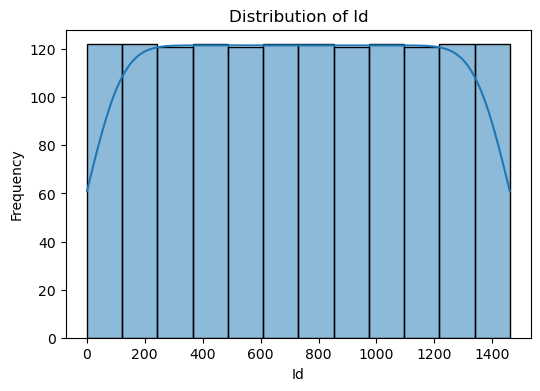

Summary for MSSubClass:
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


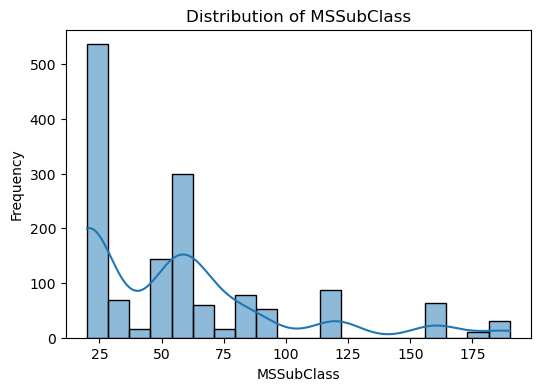

Summary for LotArea:
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


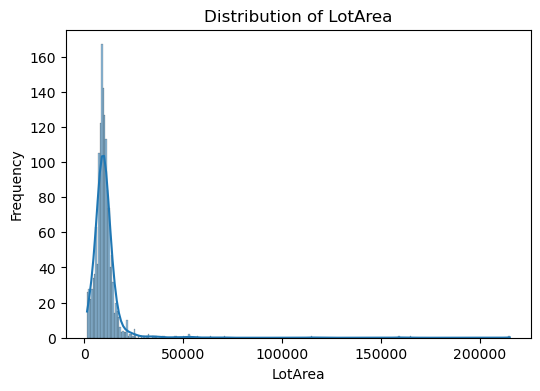

Summary for OverallQual:
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


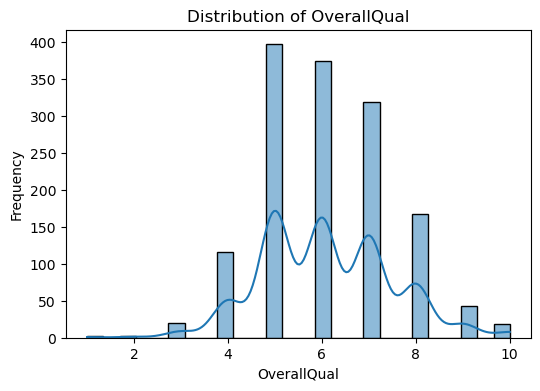

Summary for OverallCond:
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64


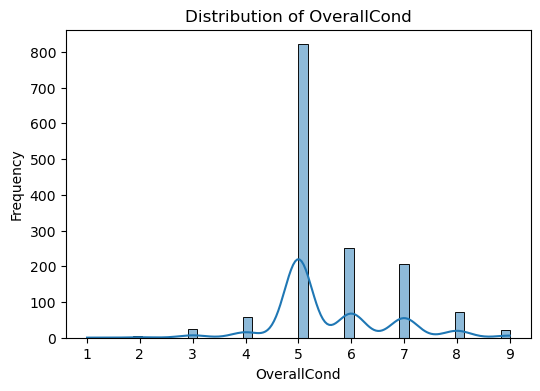

Summary for YearBuilt:
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


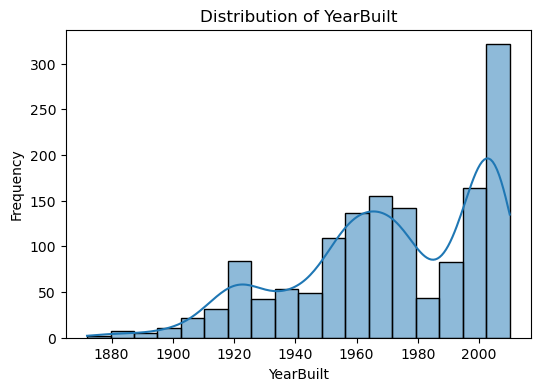

Summary for YearRemodAdd:
count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


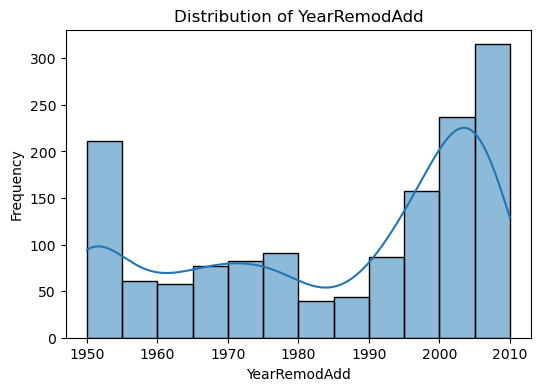

Summary for MasVnrArea:
count    1460.000000
mean      103.685262
std       180.569112
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64


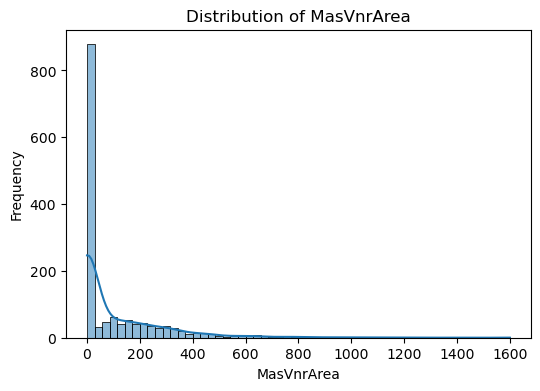

Summary for BsmtFinSF1:
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


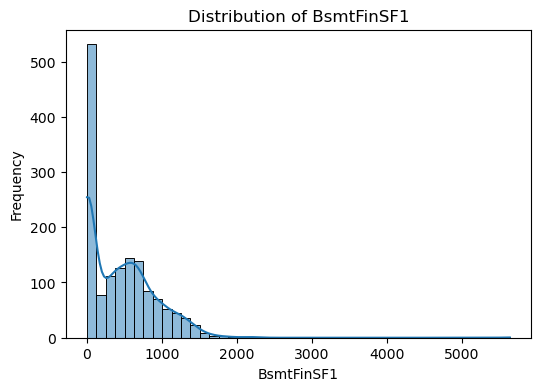

Summary for BsmtFinSF2:
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


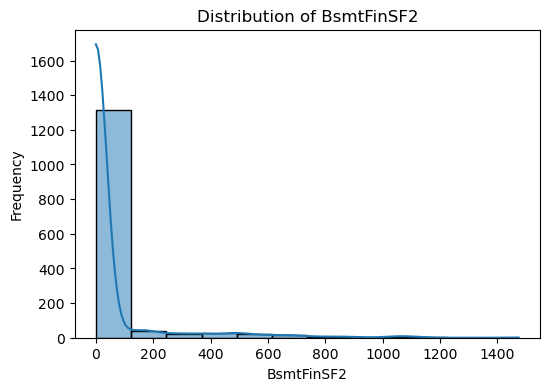

Summary for BsmtUnfSF:
count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


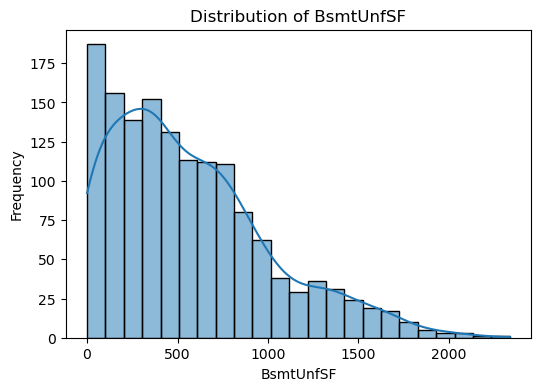

Summary for TotalBsmtSF:
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


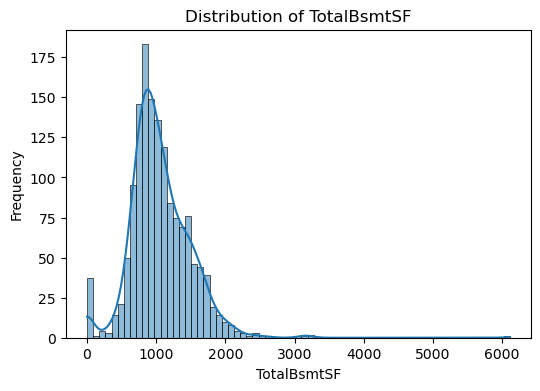

Summary for 1stFlrSF:
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


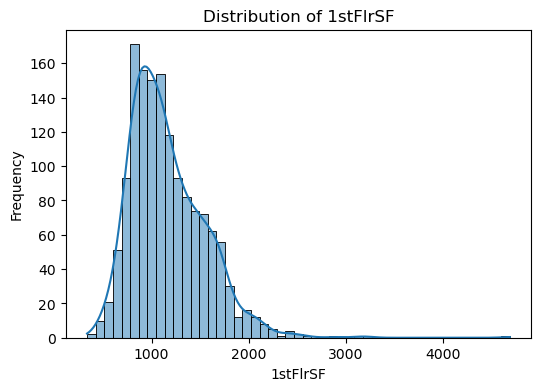

Summary for 2ndFlrSF:
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


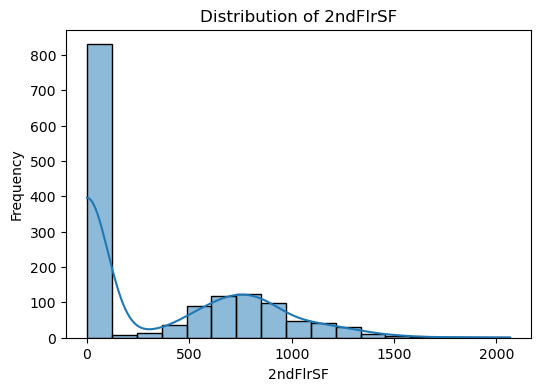

Summary for LowQualFinSF:
count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


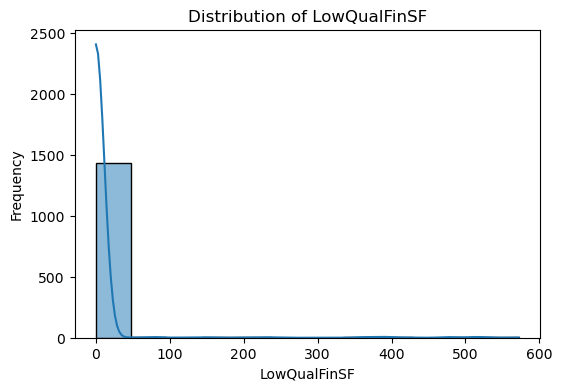

Summary for GrLivArea:
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


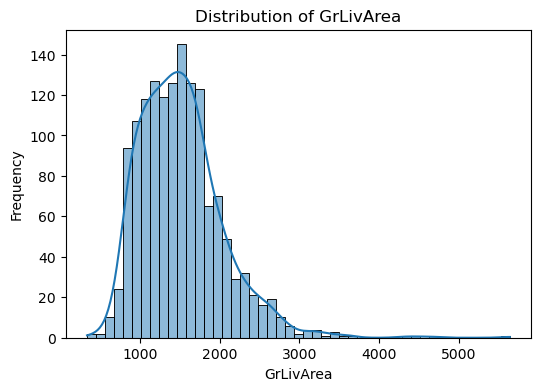

Summary for BsmtFullBath:
count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


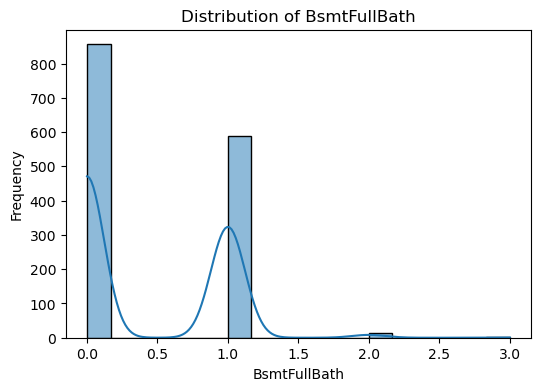

Summary for BsmtHalfBath:
count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


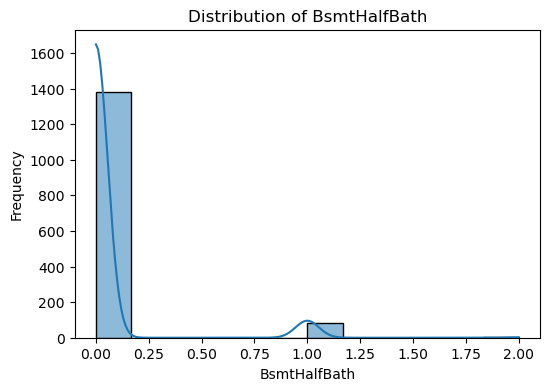

Summary for FullBath:
count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


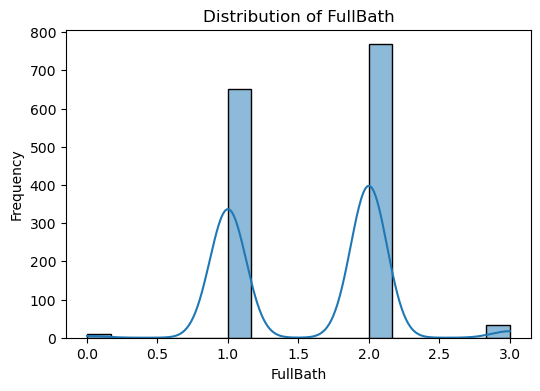

Summary for HalfBath:
count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


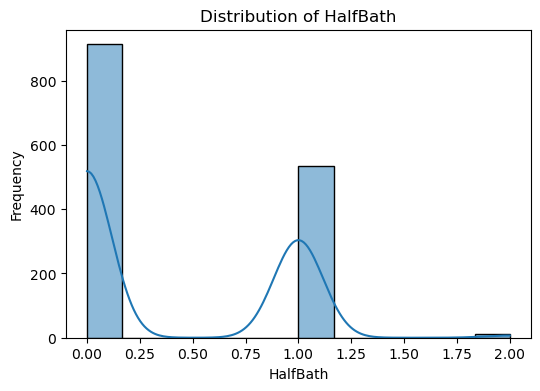

Summary for BedroomAbvGr:
count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


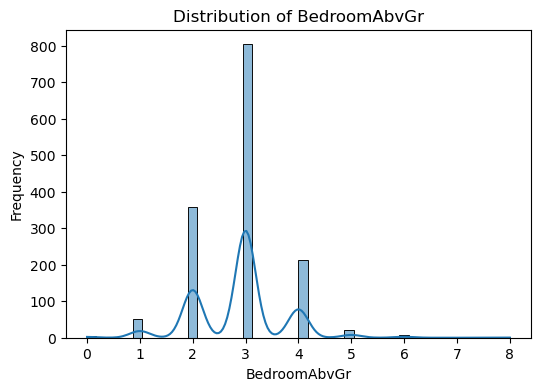

Summary for KitchenAbvGr:
count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64


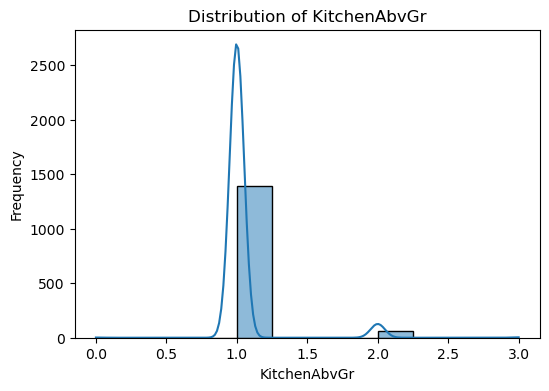

Summary for TotRmsAbvGrd:
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


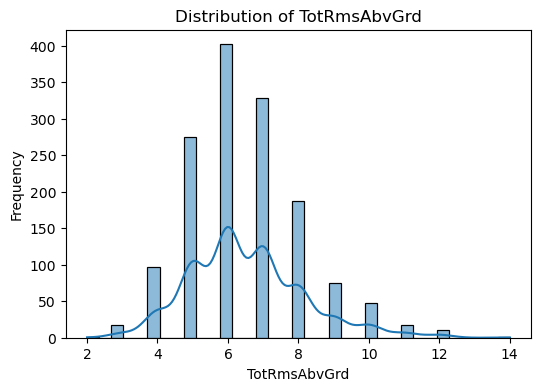

Summary for Fireplaces:
count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


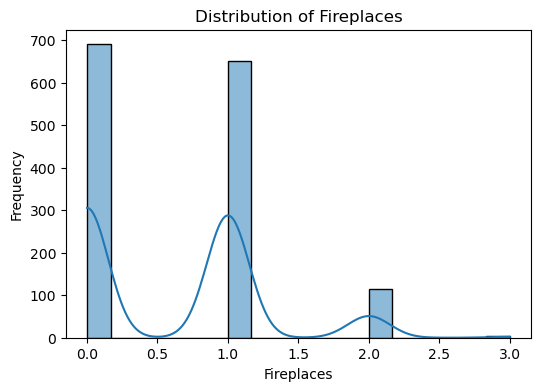

Summary for GarageCars:
count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


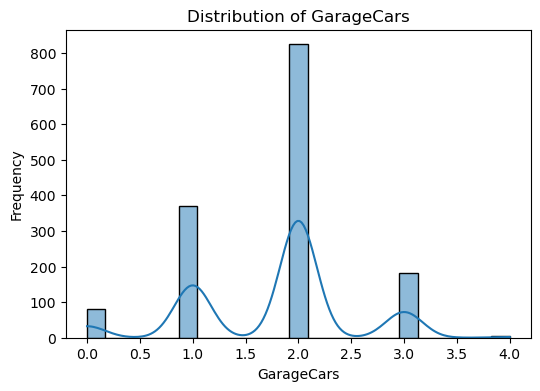

Summary for GarageArea:
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


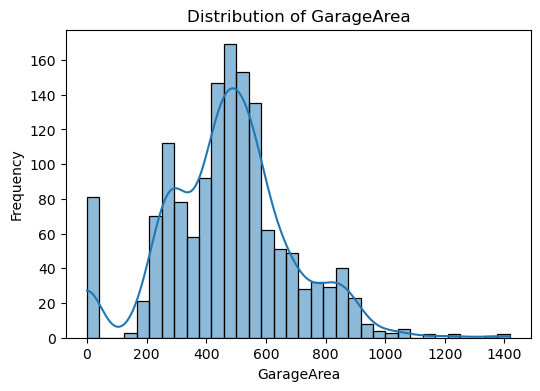

Summary for WoodDeckSF:
count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64


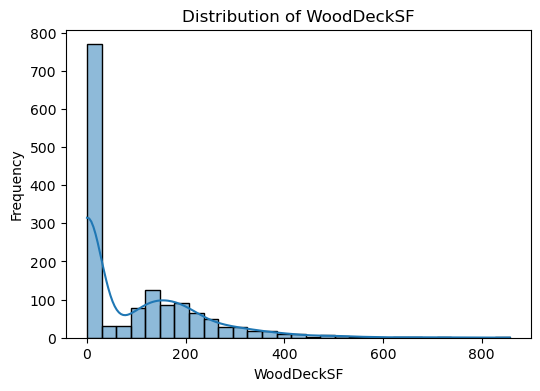

Summary for OpenPorchSF:
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


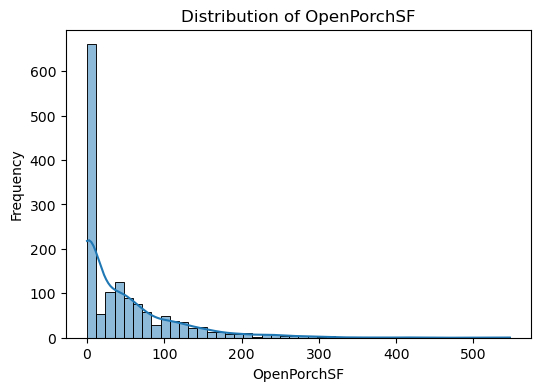

Summary for EnclosedPorch:
count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


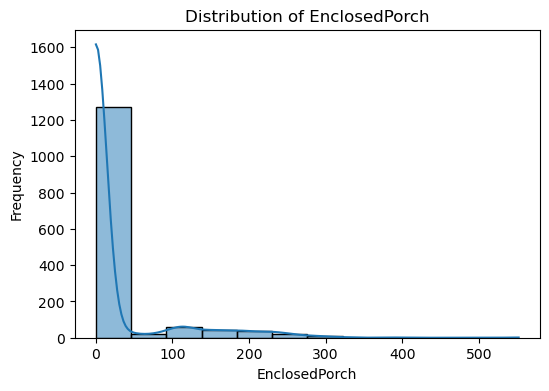

Summary for 3SsnPorch:
count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


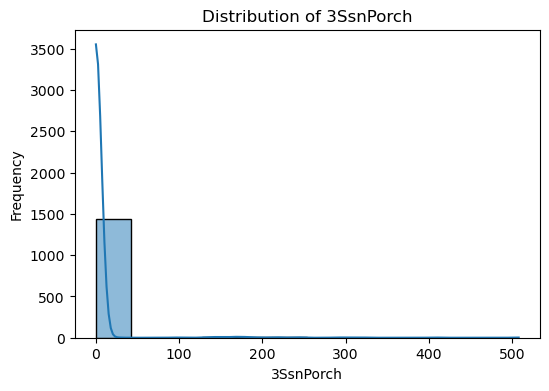

Summary for ScreenPorch:
count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


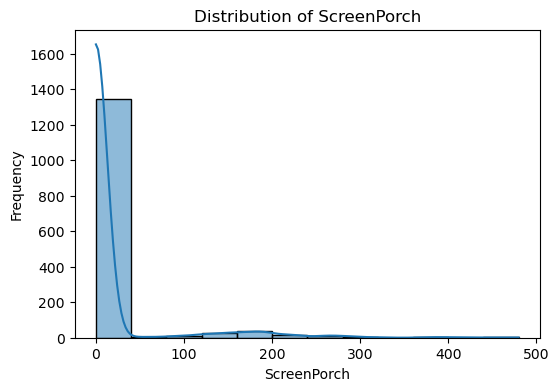

Summary for PoolArea:
count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


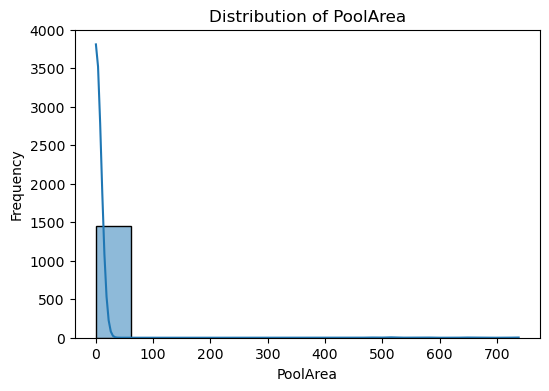

Summary for MiscVal:
count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


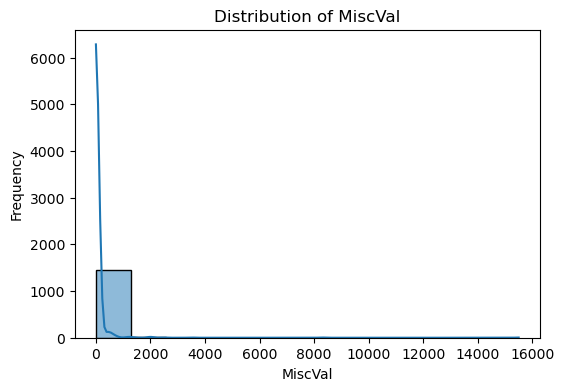

Summary for MoSold:
count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


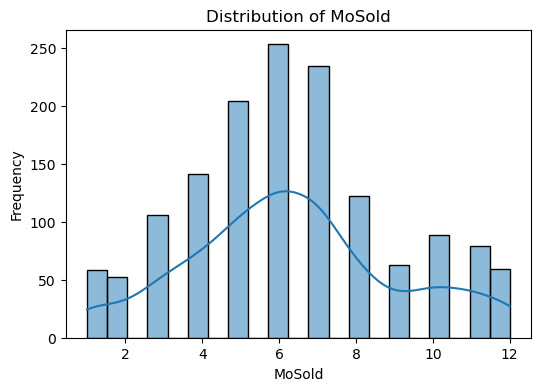

Summary for YrSold:
count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64


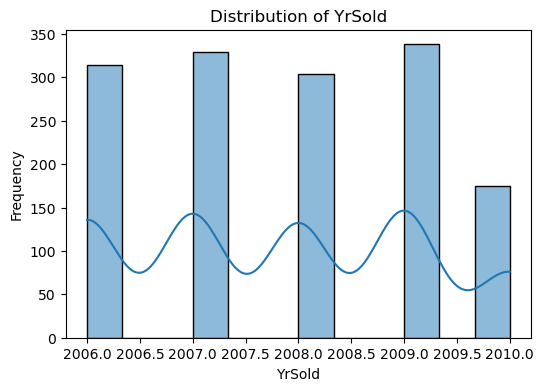

Summary for SalePrice:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


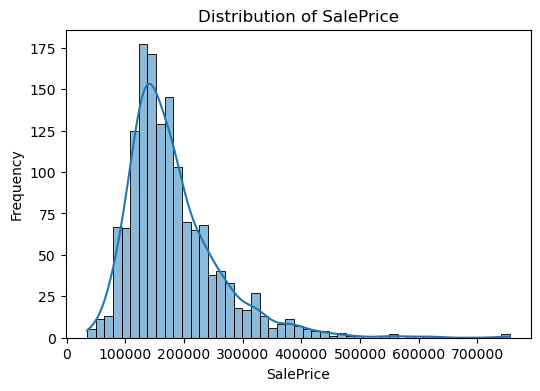

In [132]:
for column in df.columns:
    if df[column].dtype in [int, float]:  # Numeric columns
        print(f"Summary for {column}:")
        print(df[column].describe())
        plt.figure(figsize=(6, 4))
        sns.histplot(df[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

Summary for MSZoning:
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object


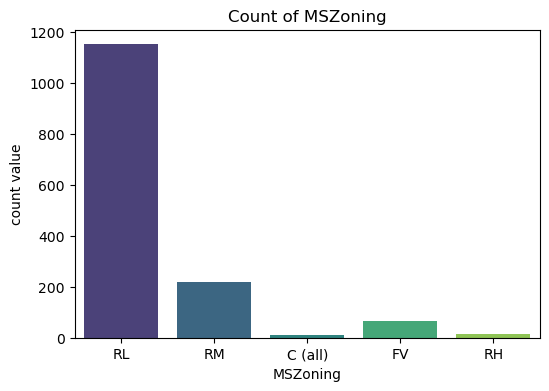

Summary for Street:
count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object


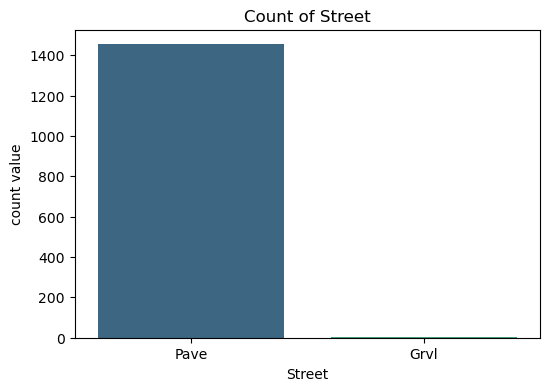

Summary for LotShape:
count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object


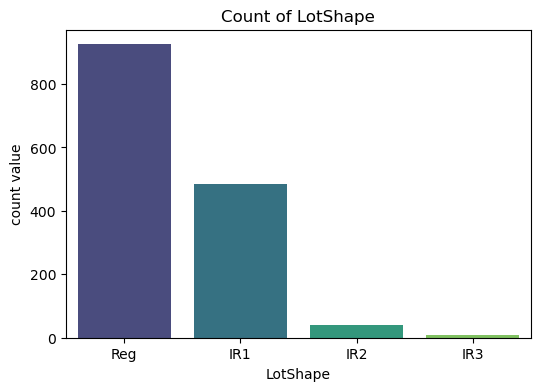

Summary for LandContour:
count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object


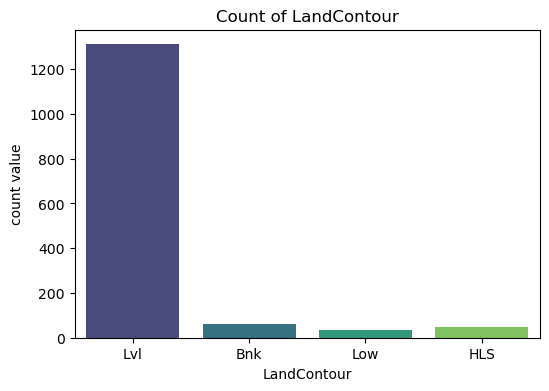

Summary for Utilities:
count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object


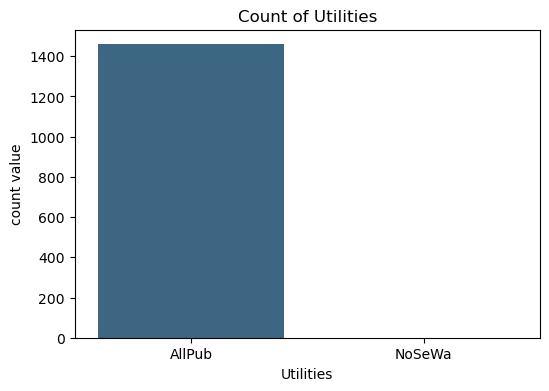

Summary for LotConfig:
count       1460
unique         5
top       Inside
freq        1052
Name: LotConfig, dtype: object


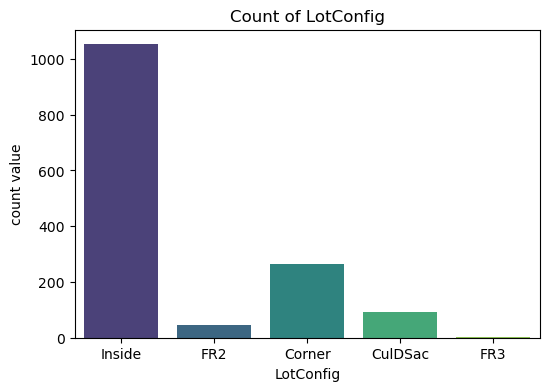

Summary for LandSlope:
count     1460
unique       3
top        Gtl
freq      1382
Name: LandSlope, dtype: object


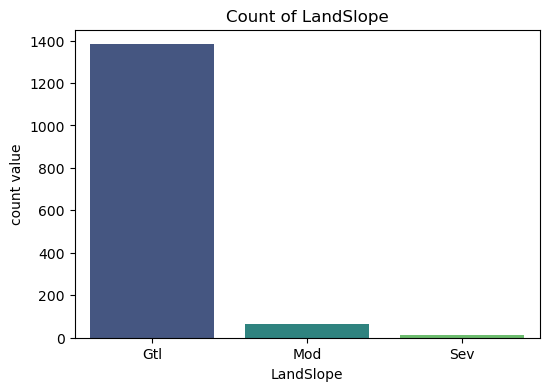

Summary for Neighborhood:
count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object


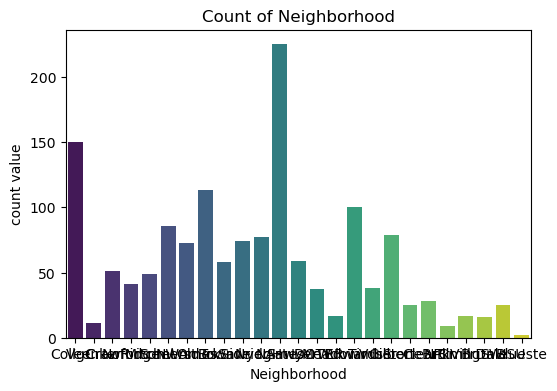

Summary for Condition1:
count     1460
unique       9
top       Norm
freq      1260
Name: Condition1, dtype: object


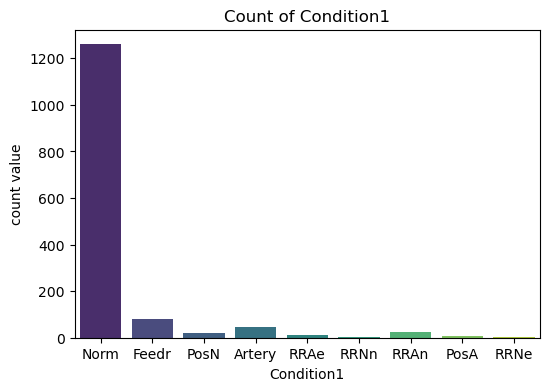

Summary for Condition2:
count     1460
unique       8
top       Norm
freq      1445
Name: Condition2, dtype: object


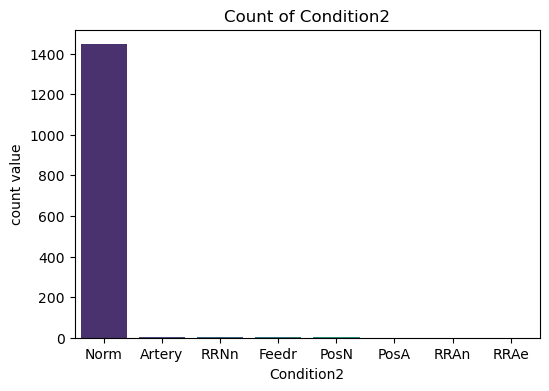

Summary for BldgType:
count     1460
unique       5
top       1Fam
freq      1220
Name: BldgType, dtype: object


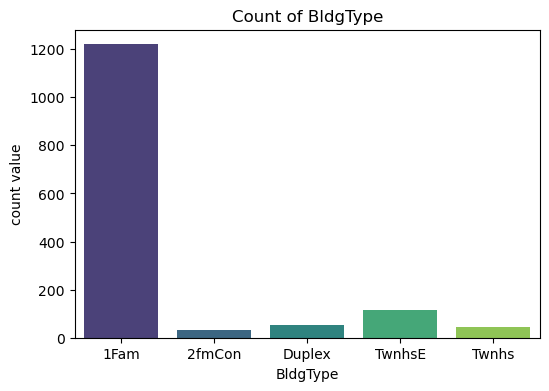

Summary for HouseStyle:
count       1460
unique         8
top       1Story
freq         726
Name: HouseStyle, dtype: object


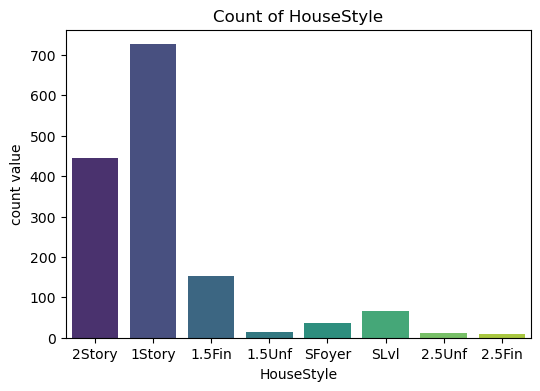

Summary for RoofStyle:
count      1460
unique        6
top       Gable
freq       1141
Name: RoofStyle, dtype: object


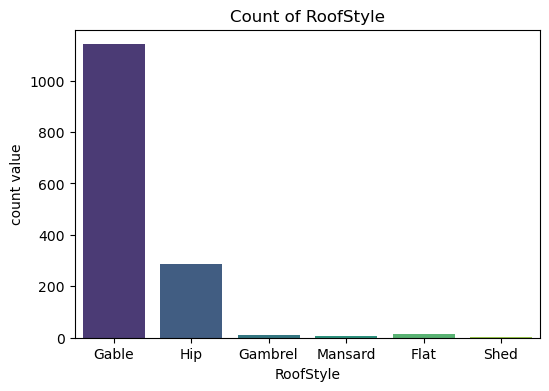

Summary for RoofMatl:
count        1460
unique          8
top       CompShg
freq         1434
Name: RoofMatl, dtype: object


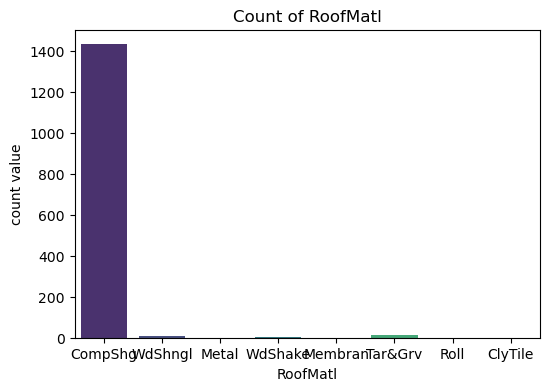

Summary for Exterior1st:
count        1460
unique         15
top       VinylSd
freq          515
Name: Exterior1st, dtype: object


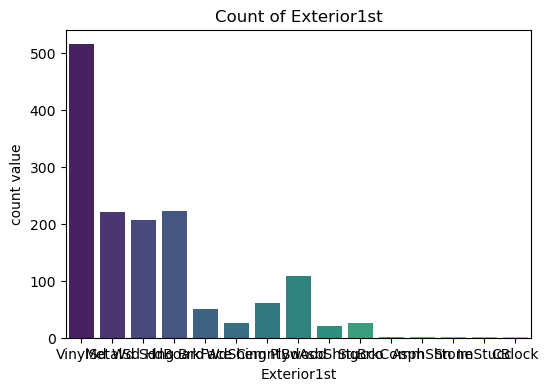

Summary for Exterior2nd:
count        1460
unique         16
top       VinylSd
freq          504
Name: Exterior2nd, dtype: object


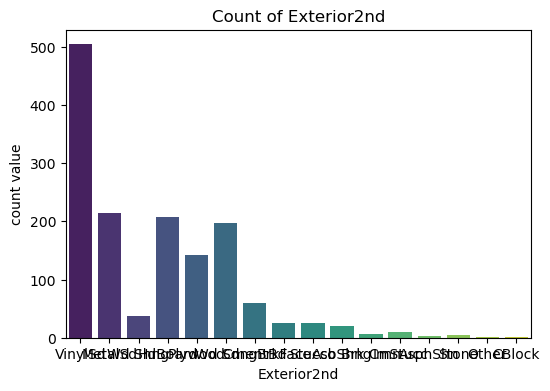

Summary for ExterQual:
count     1460
unique       4
top         TA
freq       906
Name: ExterQual, dtype: object


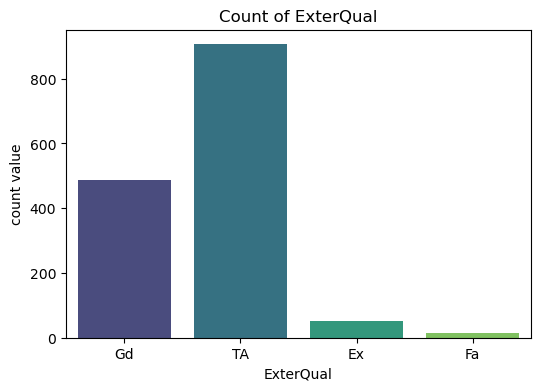

Summary for ExterCond:
count     1460
unique       5
top         TA
freq      1282
Name: ExterCond, dtype: object


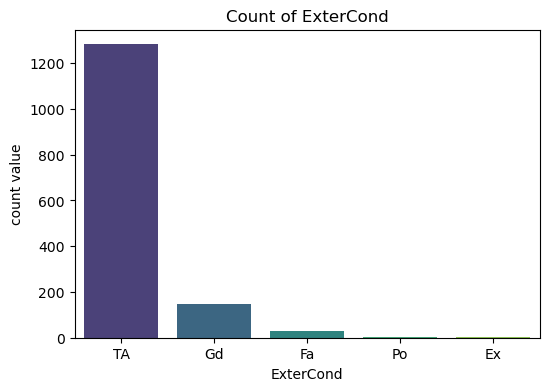

Summary for Foundation:
count      1460
unique        6
top       PConc
freq        647
Name: Foundation, dtype: object


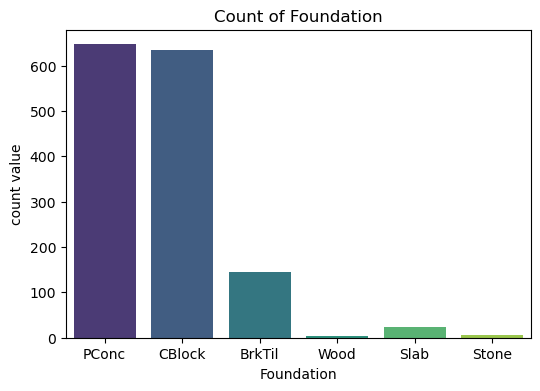

Summary for Heating:
count     1460
unique       6
top       GasA
freq      1428
Name: Heating, dtype: object


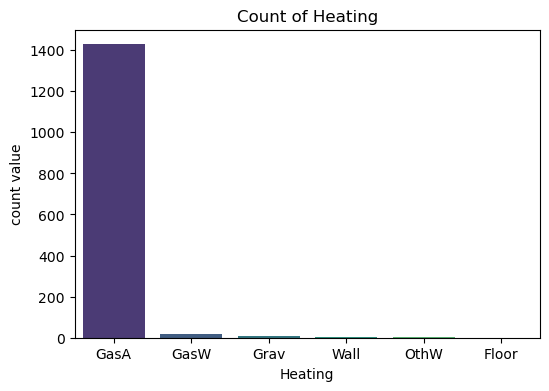

Summary for HeatingQC:
count     1460
unique       5
top         Ex
freq       741
Name: HeatingQC, dtype: object


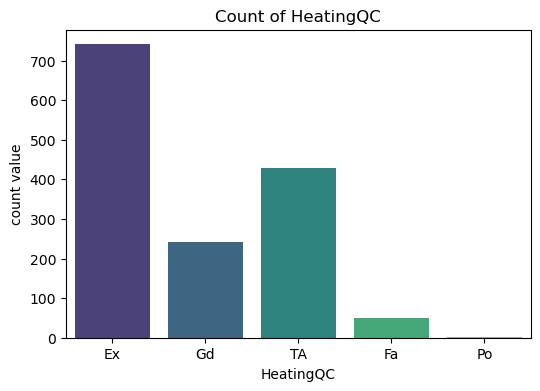

Summary for CentralAir:
count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object


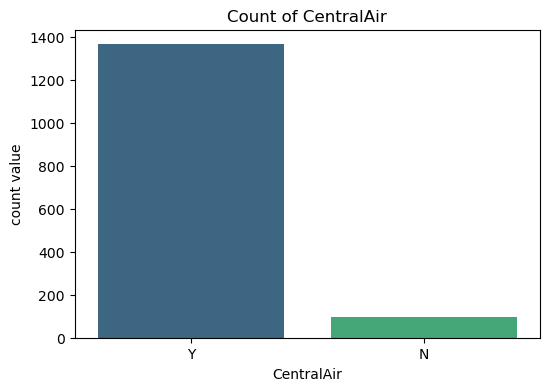

Summary for KitchenQual:
count     1460
unique       4
top         TA
freq       735
Name: KitchenQual, dtype: object


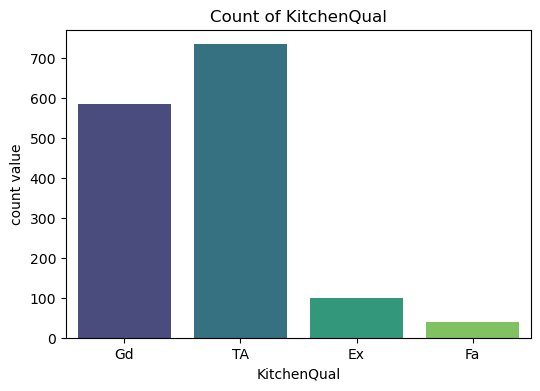

Summary for Functional:
count     1460
unique       7
top        Typ
freq      1360
Name: Functional, dtype: object


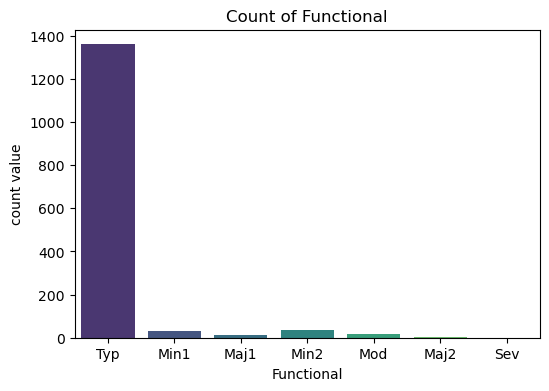

Summary for PavedDrive:
count     1460
unique       3
top          Y
freq      1340
Name: PavedDrive, dtype: object


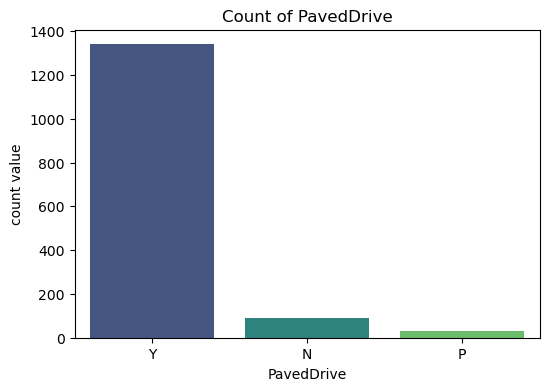

Summary for SaleType:
count     1460
unique       9
top         WD
freq      1267
Name: SaleType, dtype: object


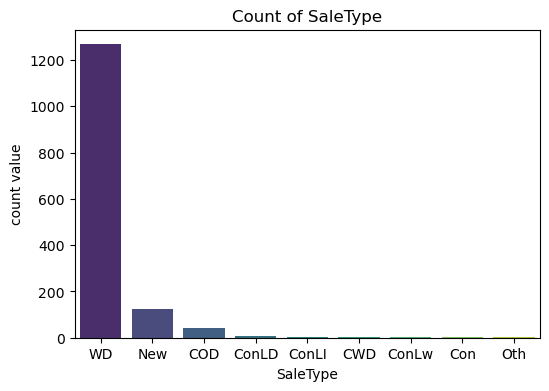

Summary for SaleCondition:
count       1460
unique         6
top       Normal
freq        1198
Name: SaleCondition, dtype: object


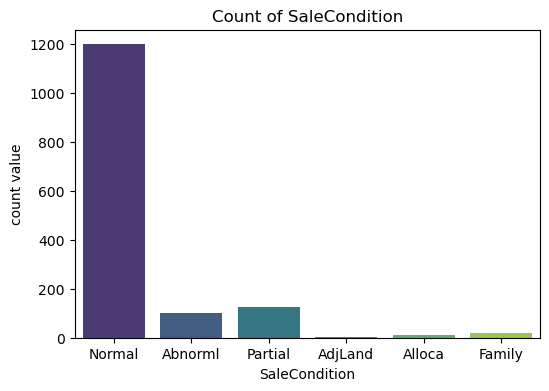

In [133]:
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column is categorical (object-type)
        print(f"Summary for {column}:")
        print(df[column].describe())
        plt.figure(figsize=(6, 4))
        sns.countplot(x=column, data=df, palette='viridis')
        plt.title(f"Count of {column}")
        plt.xlabel(column)
        plt.ylabel("count value")
        plt.show()

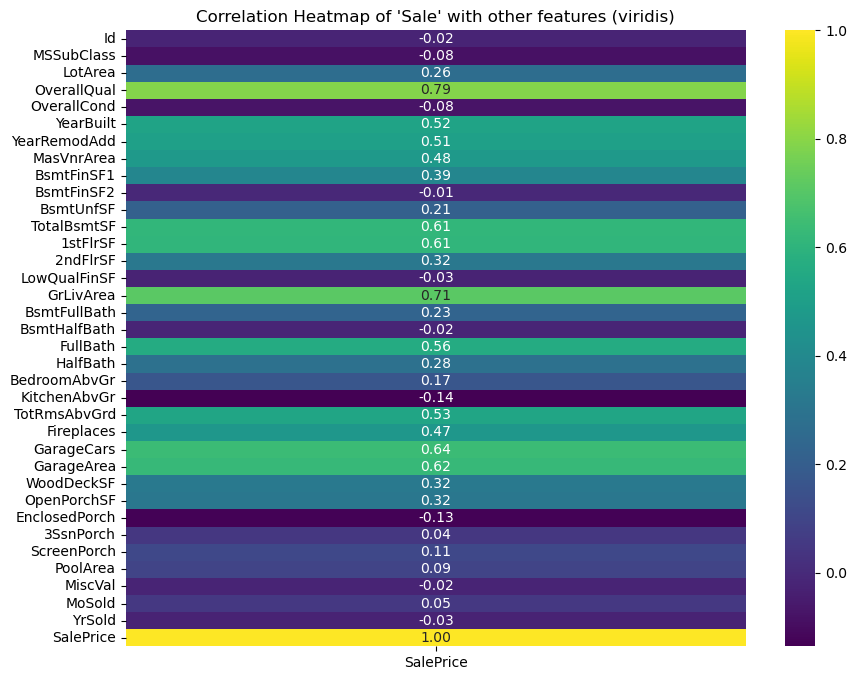

In [134]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['SalePrice']], annot=True, cmap='viridis', fmt='.2f')

# Set the title
plt.title("Correlation Heatmap of 'Sale' with other features (viridis)")

# Show the plot
plt.show()

### Scaling the numerical data 

In [135]:
# Select numerical columns (integers or floats)
numeric_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
# Remove 'SalesPrice' from the list of numeric columns
numeric_columns.remove('SalePrice')

scaler = StandardScaler()

# Standardize numerical columns excluding 'SalesPrice'
for column in numeric_columns:
    df[[column]] = scaler.fit_transform(df[[column]])
df

Id  MSSubClass MSZoning    LotArea Street LotShape LandContour  \
0    -1.730865    0.073375       RL  -0.207142   Pave      Reg         Lvl   
1    -1.728492   -0.872563       RL  -0.091886   Pave      Reg         Lvl   
2    -1.726120    0.073375       RL   0.073480   Pave      IR1         Lvl   
3    -1.723747    0.309859       RL  -0.096897   Pave      IR1         Lvl   
4    -1.721374    0.073375       RL   0.375148   Pave      IR1         Lvl   
5    -1.719002   -0.163109       RL   0.360616   Pave      IR1         Lvl   
6    -1.716629   -0.872563       RL  -0.043379   Pave      Reg         Lvl   
7    -1.714256    0.073375       RL  -0.013513   Pave      IR1         Lvl   
8    -1.711883   -0.163109       RM  -0.440659   Pave      Reg         Lvl   
9    -1.709511    3.147673       RL  -0.310370   Pave      Reg         Lvl   
10   -1.707138   -0.872563       RL   0.068469   Pave      Reg         Lvl   
11   -1.704765    0.073375       RL   0.141030   Pave      IR1         Lvl   
12   -1.702393   -0.872563       RL   0.245661   Pave      IR2         Lvl   
13   -1.700020   -0.872563       RL   0.013547   Pave      IR1         Lvl   
14   -1.697647   -0.872563       RL   0.040407   Pave      IR1         Lvl   
15   -1.695275   -0.281352       RM  -0.440659   Pave      Reg         Lvl   
16   -1.692902   -0.872563       RL   0.072578   Pave      IR1         Lvl   
17   -1.690529    0.782828       RL   0.027478   Pave      Reg         Lvl   
18   -1.688157   -0.872563       RL   0.318523   Pave      Reg         Lvl   
19   -1.685784   -0.872563       RL  -0.296339   Pave      Reg         Lvl   
20   -1.683411    0.073375       RL   0.370638   Pave      IR1         Lvl   
21   -1.681039   -0.281352       RM  -0.307464   Pave      Reg         Bnk   
22   -1.678666   -0.872563       RL  -0.077655   Pave      Reg         Lvl   
23   -1.676293    1.492282       RM  -0.630680   Pave      Reg         Lvl   
24   -1.673921   -0.872563       RL  -0.227587   Pave      IR1         Lvl   
25   -1.671548   -0.872563       RL   0.372142   Pave      Reg         Lvl   
26   -1.669175   -0.872563       RL  -0.332419   Pave      Reg         Lvl   
27   -1.666803   -0.872563       RL   0.096331   Pave      Reg         Lvl   
28   -1.664430   -0.872563       RL   0.581706   Pave      IR1         Lvl   
29   -1.662057   -0.636078       RM  -0.420214   Pave      IR1         Lvl   
30   -1.659685    0.309859  C (all)  -0.202131   Pave      Reg         Lvl   
31   -1.657312   -0.872563       RL  -0.197721   Pave      IR1         Lvl   
32   -1.654939   -0.872563       RL   0.053335   Pave      Reg         Lvl   
33   -1.652567   -0.872563       RL   0.003525   Pave      IR1         Lvl   
34   -1.650194    1.492282       RL  -0.321094   Pave      Reg         Lvl   
35   -1.647821    0.073375       RL   0.290761   Pave      Reg         Lvl   
36   -1.645449   -0.872563       RL   0.034293   Pave      Reg         Lvl   
37   -1.643076   -0.872563       RL  -0.198924   Pave      Reg         Lvl   
38   -1.640703   -0.872563       RL  -0.260059   Pave      Reg         Lvl   
39   -1.638331    0.782828       RL  -0.448677   Pave      Reg         Lvl   
40   -1.635958   -0.872563       RL  -0.186296   Pave      Reg         Lvl   
41   -1.633585   -0.872563       RL   0.640236   Pave      Reg         Lvl   
42   -1.631213    0.664586       RL  -0.133980   Pave      IR1         Lvl   
43   -1.628840   -0.872563       RL  -0.131975   Pave      IR1         Lvl   
44   -1.626467   -0.872563       RL  -0.257754   Pave      Reg         Lvl   
45   -1.624095    1.492282       RL  -0.286518   Pave      Reg         Lvl   
46   -1.621722   -0.163109       RL   0.231029   Pave      IR1         Lvl   
47   -1.619349   -0.872563       FV   0.058046   Pave      Reg         Lvl   
48   -1.616977    3.147673       RM  -0.607428   Pave      Reg         Lvl   
49   -1.614604   -0.872563       RL  -0.278099   Pave      Reg         Lvl   
50   -1.612231    0.073375       R

### checking outliers

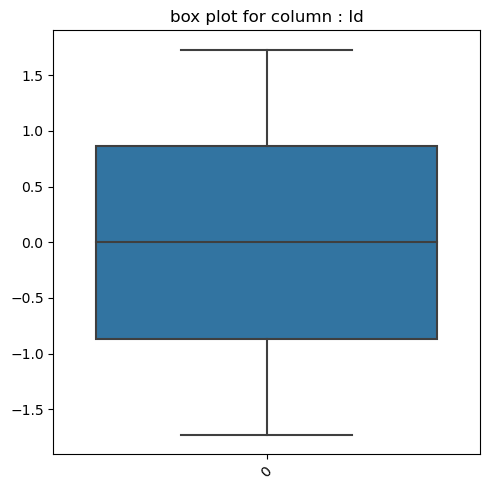

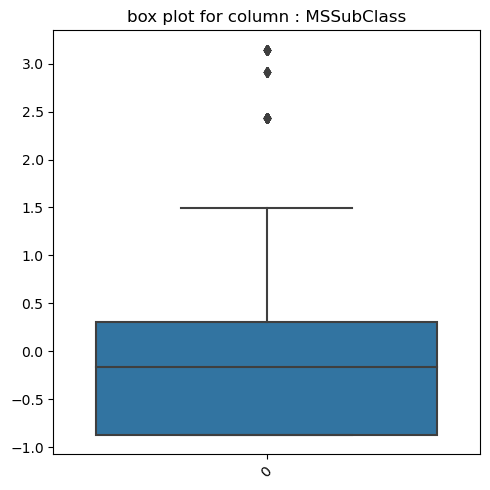

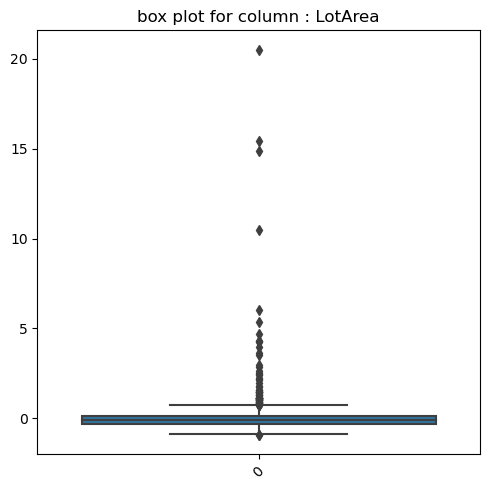

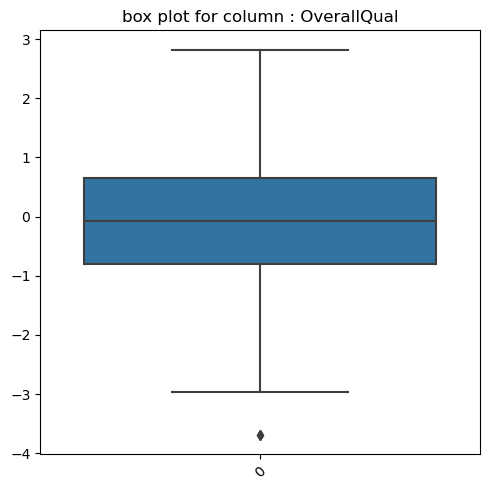

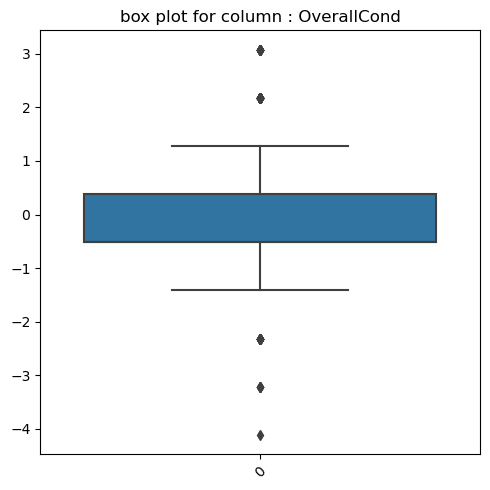

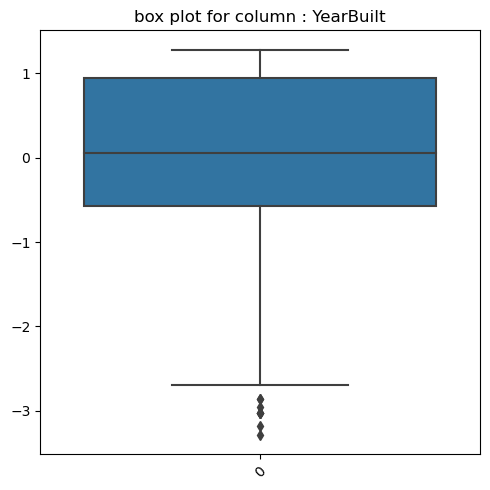

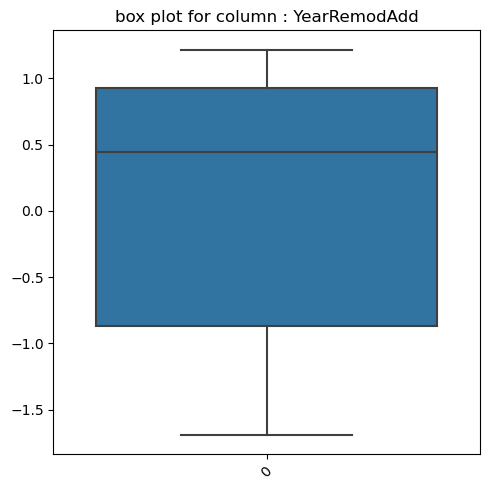

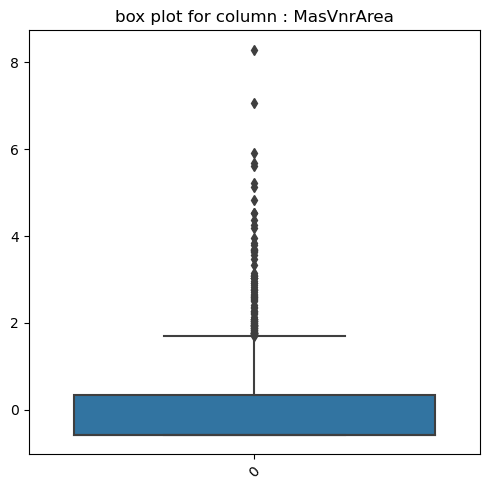

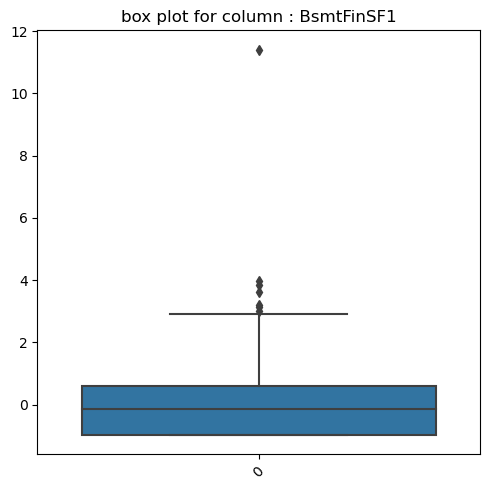

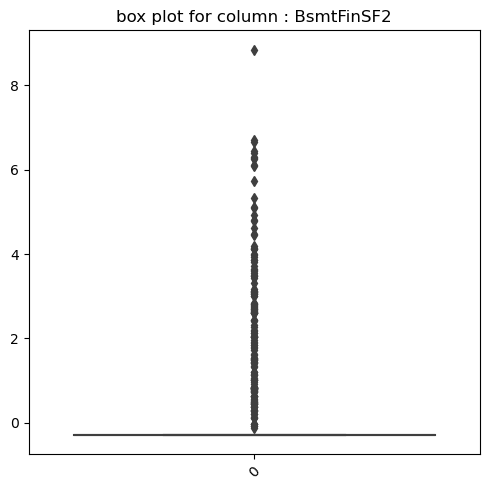

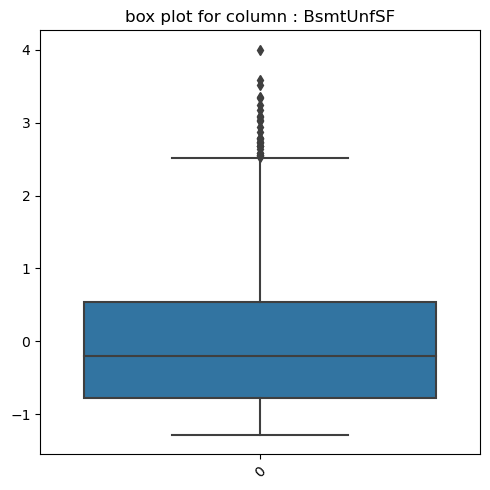

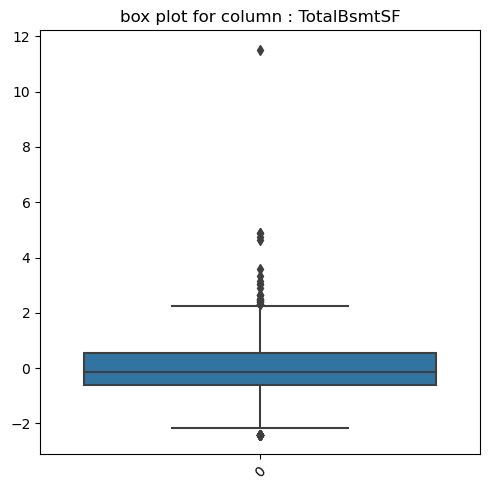

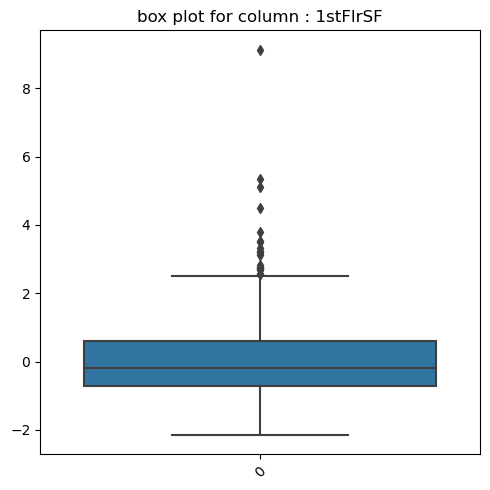

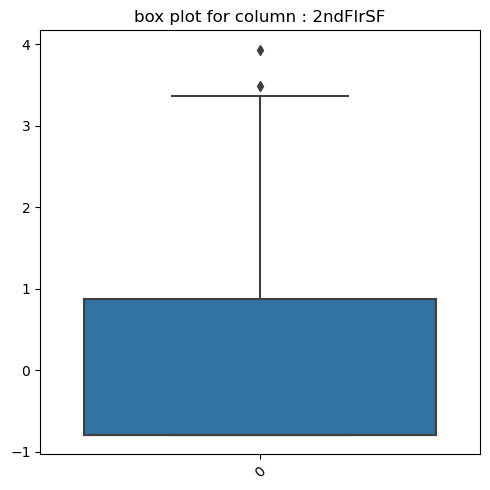

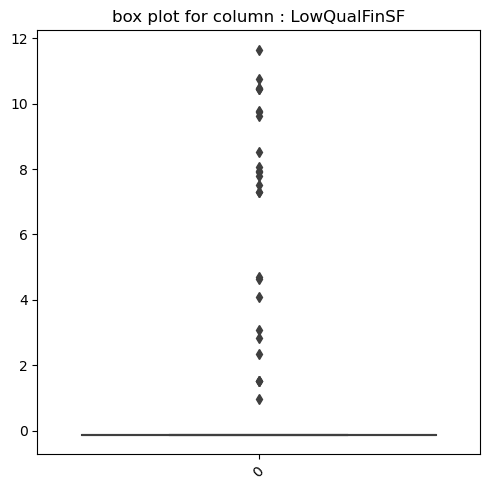

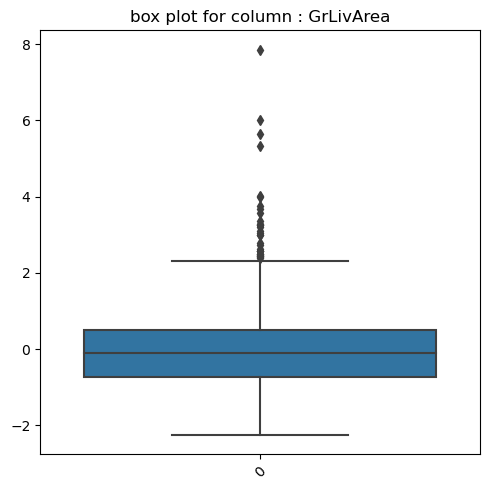

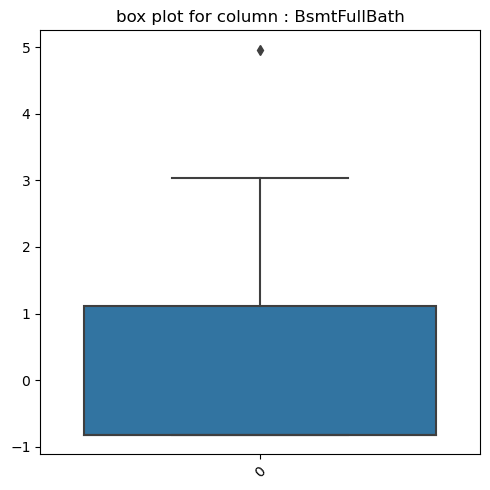

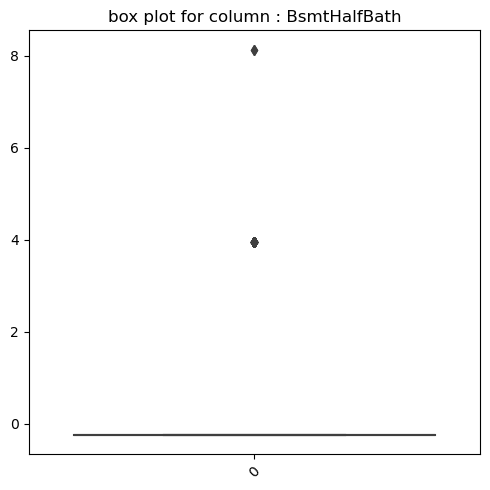

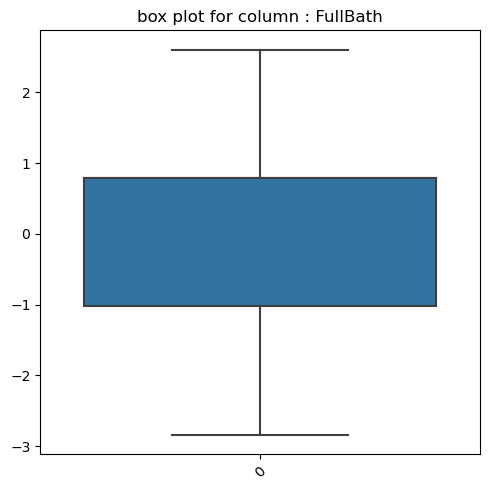

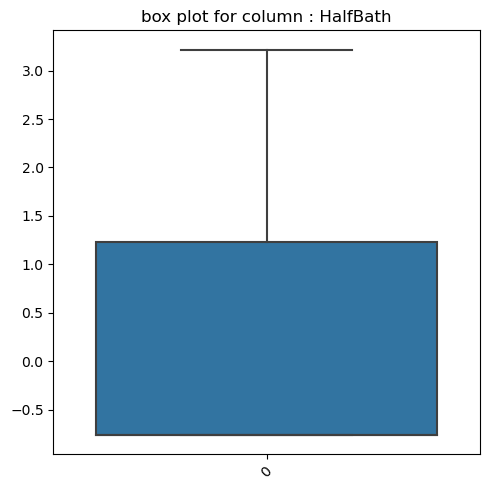

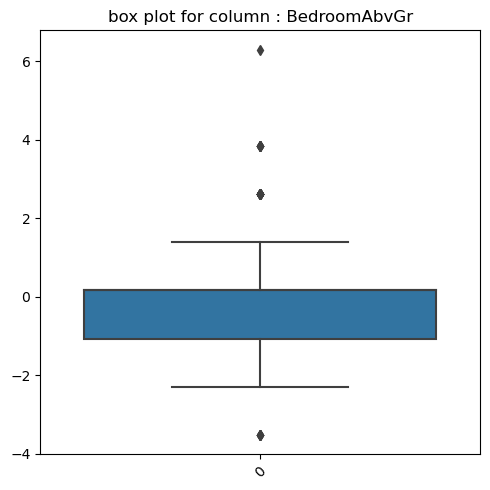

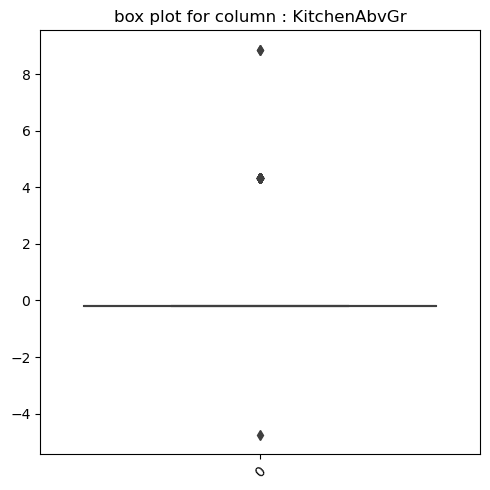

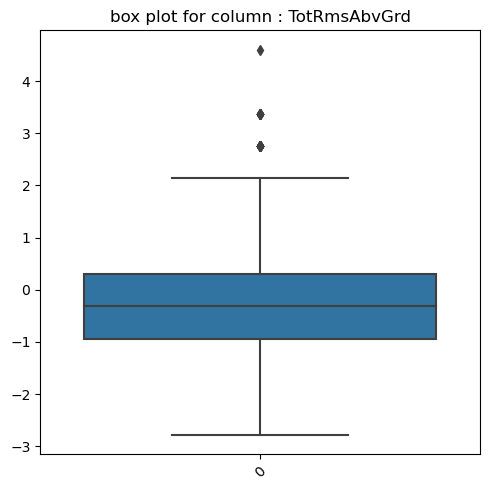

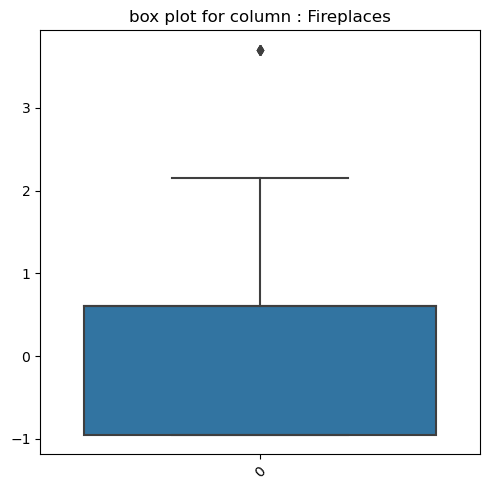

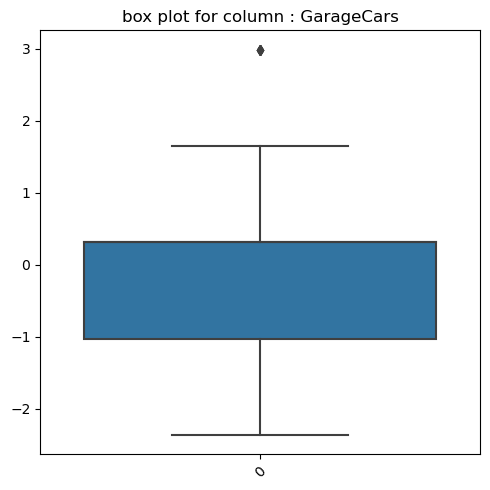

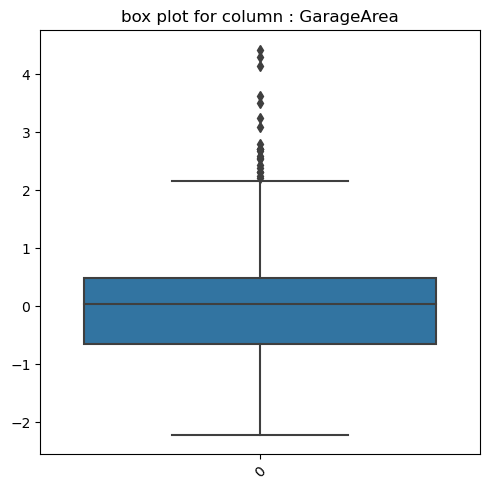

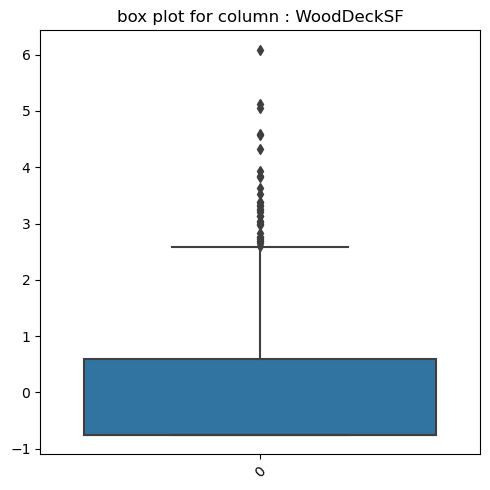

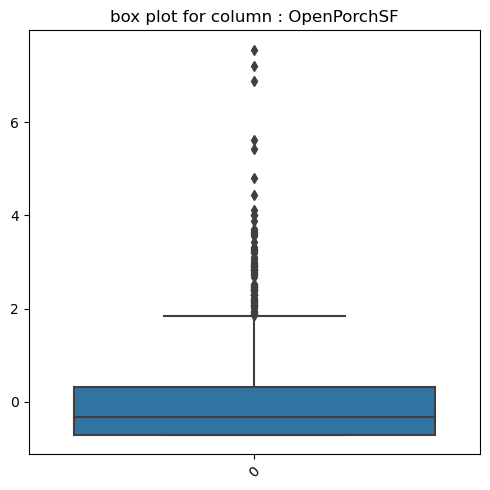

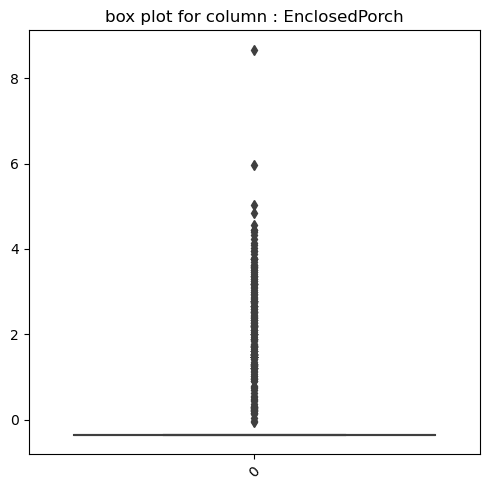

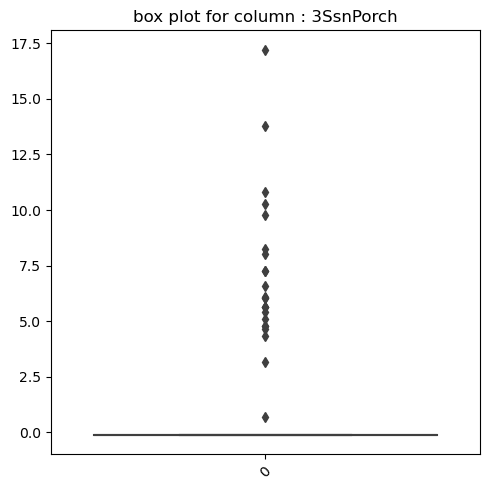

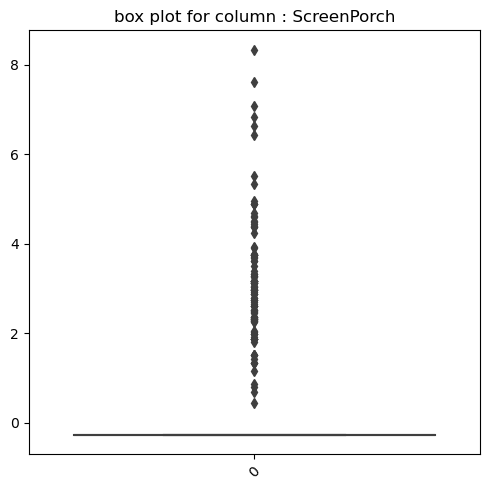

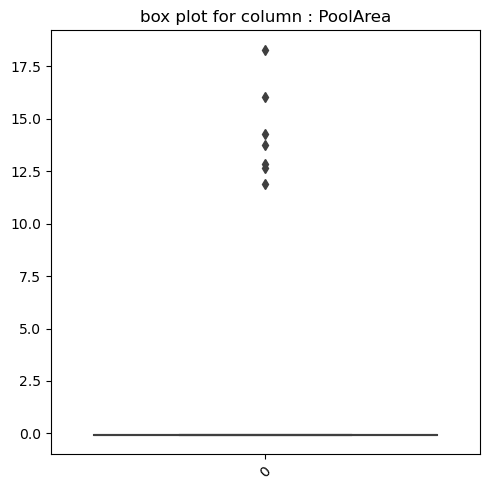

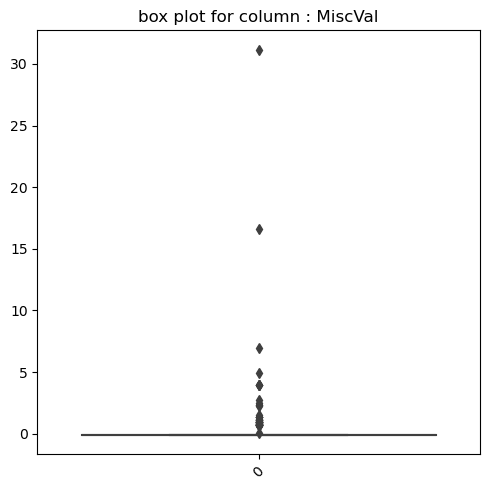

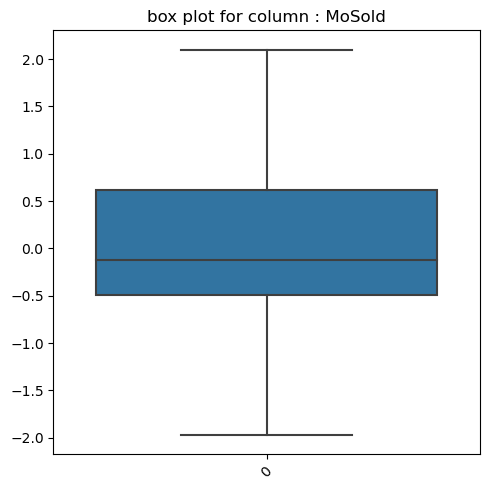

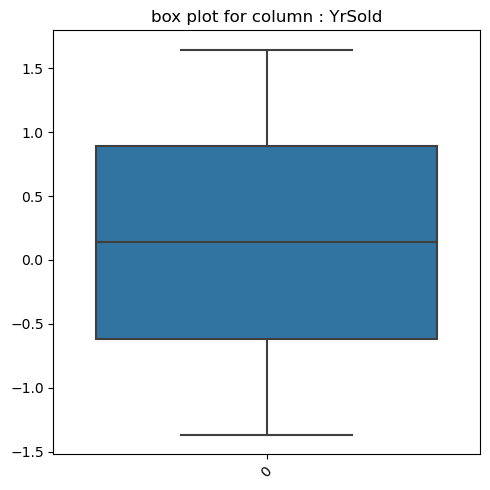

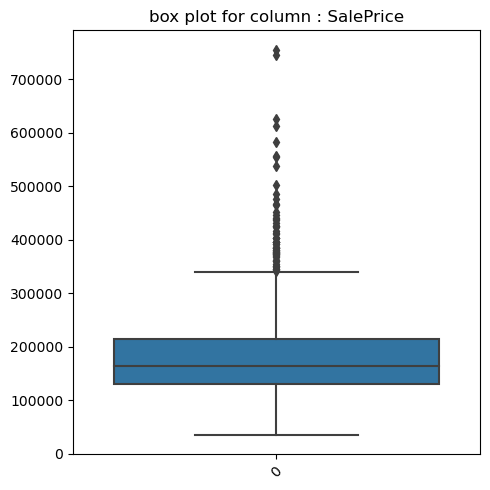

In [136]:
for column in df.columns:
    if df[column].dtype in [int, float]:
        plt.figure(figsize=(5, 5))
        sns.boxplot(data=df[column])
        plt.xticks(rotation=45)
        plt.title(f"box plot for column : {column}")
        plt.tight_layout()
        plt.show()

In [137]:
# Select numerical columns (integers or floats)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Loop through the numeric columns (excluding 'SalePrice')
for column in numeric_columns:
    # Calculate Q1 and Q3 for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR for the column
    IQR = Q3 - Q1

    # Define a threshold to detect outliers (e.g., 1.5 times the IQR)
    threshold = 1.5

    # Find outliers for the column
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Identify rows without outliers for the column
    no_outliers = ((df[column] >= lower_bound) & (df[column] <= upper_bound))

    # Filter the DataFrame to remove outliers for the column
    df = df[no_outliers]
   






In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 1455
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             566 non-null    float64
 1   MSSubClass     566 non-null    float64
 2   MSZoning       566 non-null    int64  
 3   LotArea        566 non-null    float64
 4   Street         566 non-null    int64  
 5   LotShape       566 non-null    int64  
 6   LandContour    566 non-null    int64  
 7   Utilities      566 non-null    int64  
 8   LotConfig      566 non-null    int64  
 9   LandSlope      566 non-null    int64  
 10  Neighborhood   566 non-null    int64  
 11  Condition1     566 non-null    int64  
 12  Condition2     566 non-null    int64  
 13  BldgType       566 non-null    int64  
 14  HouseStyle     566 non-null    int64  
 15  OverallQual    566 non-null    float64
 16  OverallCond    566 non-null    float64
 17  YearBuilt      566 non-null    float64
 18  YearRemod

### Encoding For Categorical column

In [139]:
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column is categorical (object-type)
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])


df

Id  MSSubClass  MSZoning   LotArea  Street  LotShape  LandContour  \
0    -1.730865    0.073375         2 -0.207142       1         3            3   
2    -1.726120    0.073375         2  0.073480       1         0            3   
4    -1.721374    0.073375         2  0.375148       1         0            3   
6    -1.716629   -0.872563         2 -0.043379       1         3            3   
10   -1.707138   -0.872563         2  0.068469       1         3            3   
13   -1.700020   -0.872563         2  0.013547       1         0            3   
18   -1.688157   -0.872563         2  0.318523       1         3            3   
19   -1.685784   -0.872563         2 -0.296339       1         3            3   
20   -1.683411    0.073375         2  0.370638       1         0            3   
23   -1.676293    1.492282         3 -0.630680       1         3            3   
27   -1.666803   -0.872563         2  0.096331       1         3            3   
31   -1.657312   -0.872563         2 -0.197721       1         0            3   
32   -1.654939   -0.872563         2  0.053335       1         3            3   
34   -1.650194    1.492282         2 -0.321094       1         3            3   
35   -1.647821    0.073375         2  0.290761       1         3            3   
36   -1.645449   -0.872563         2  0.034293       1         3            3   
38   -1.640703   -0.872563         2 -0.260059       1         3            3   
40   -1.635958   -0.872563         2 -0.186296       1         3            3   
45   -1.624095    1.492282         2 -0.286518       1         3            3   
47   -1.619349   -0.872563         0  0.058046       1         3            3   
49   -1.614604   -0.872563         2 -0.278099       1         3            3   
54   -1.602741    0.546344         2 -0.339034       1         3            0   
57   -1.595623    0.073375         2  0.113068       1         0            3   
59   -1.590877   -0.872563         2 -0.332419       1         3            0   
60   -1.588505   -0.872563         2  0.256085       1         3            3   
62   -1.583759    1.492282         2 -0.408388       1         0            3   
65   -1.576641    0.073375         2 -0.092788       1         3            3   
67   -1.571896   -0.872563         2  0.014850       1         0            3   
68   -1.569523   -0.636078         3 -0.592195       1         3            3   
71   -1.562405   -0.872563         2 -0.292431       1         3            3   
76   -1.550542   -0.872563         2 -0.204636       1         0            3   
83   -1.533933   -0.872563         2 -0.162844       1         0            3   
85   -1.529188    0.073375         2  0.555448       1         3            3   
86   -1.526815    0.073375         2  0.139727       1         1            3   
89   -1.519697   -0.872563         2 -0.245226       1         3            3   
94   -1.507834    0.073375         2 -0.118245       1         0            3   
96   -1.503088   -0.872563         2 -0.025339       1         0            3   
97   -1.500716   -0.872563         2  0.040507       1         3            1   
100  -1.493598   -0.872563         2  0.008636       1         0            3   
101  -1.491225    0.073375         2 -0.131374       1         3            3   
103  -1.486480   -0.872563         2 -0.011508       1         0            3   
110  -1.469871   -0.163109         2 -0.099403       1         3            3   
111  -1.467498    0.546344         2 -0.277297       1         0            3   
117  -1.453262   -0.872563         2 -0.198523       1         3            3   
119  -1.448517    0.073375         2 -0.206039       1         3            3   
123  -1.439026    1.492282         2 -0.263066       1         3            3   
124  -1.436653   -0.872563         2  0.654066       1         0            3   
127  -1.429535   -0.281352         3 -0.614244       1         0            0   
128  -1.427163    0.073375         2 -0.293

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 1455
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             566 non-null    float64
 1   MSSubClass     566 non-null    float64
 2   MSZoning       566 non-null    int64  
 3   LotArea        566 non-null    float64
 4   Street         566 non-null    int64  
 5   LotShape       566 non-null    int64  
 6   LandContour    566 non-null    int64  
 7   Utilities      566 non-null    int64  
 8   LotConfig      566 non-null    int64  
 9   LandSlope      566 non-null    int64  
 10  Neighborhood   566 non-null    int64  
 11  Condition1     566 non-null    int64  
 12  Condition2     566 non-null    int64  
 13  BldgType       566 non-null    int64  
 14  HouseStyle     566 non-null    int64  
 15  OverallQual    566 non-null    float64
 16  OverallCond    566 non-null    float64
 17  YearBuilt      566 non-null    float64
 18  YearRemod

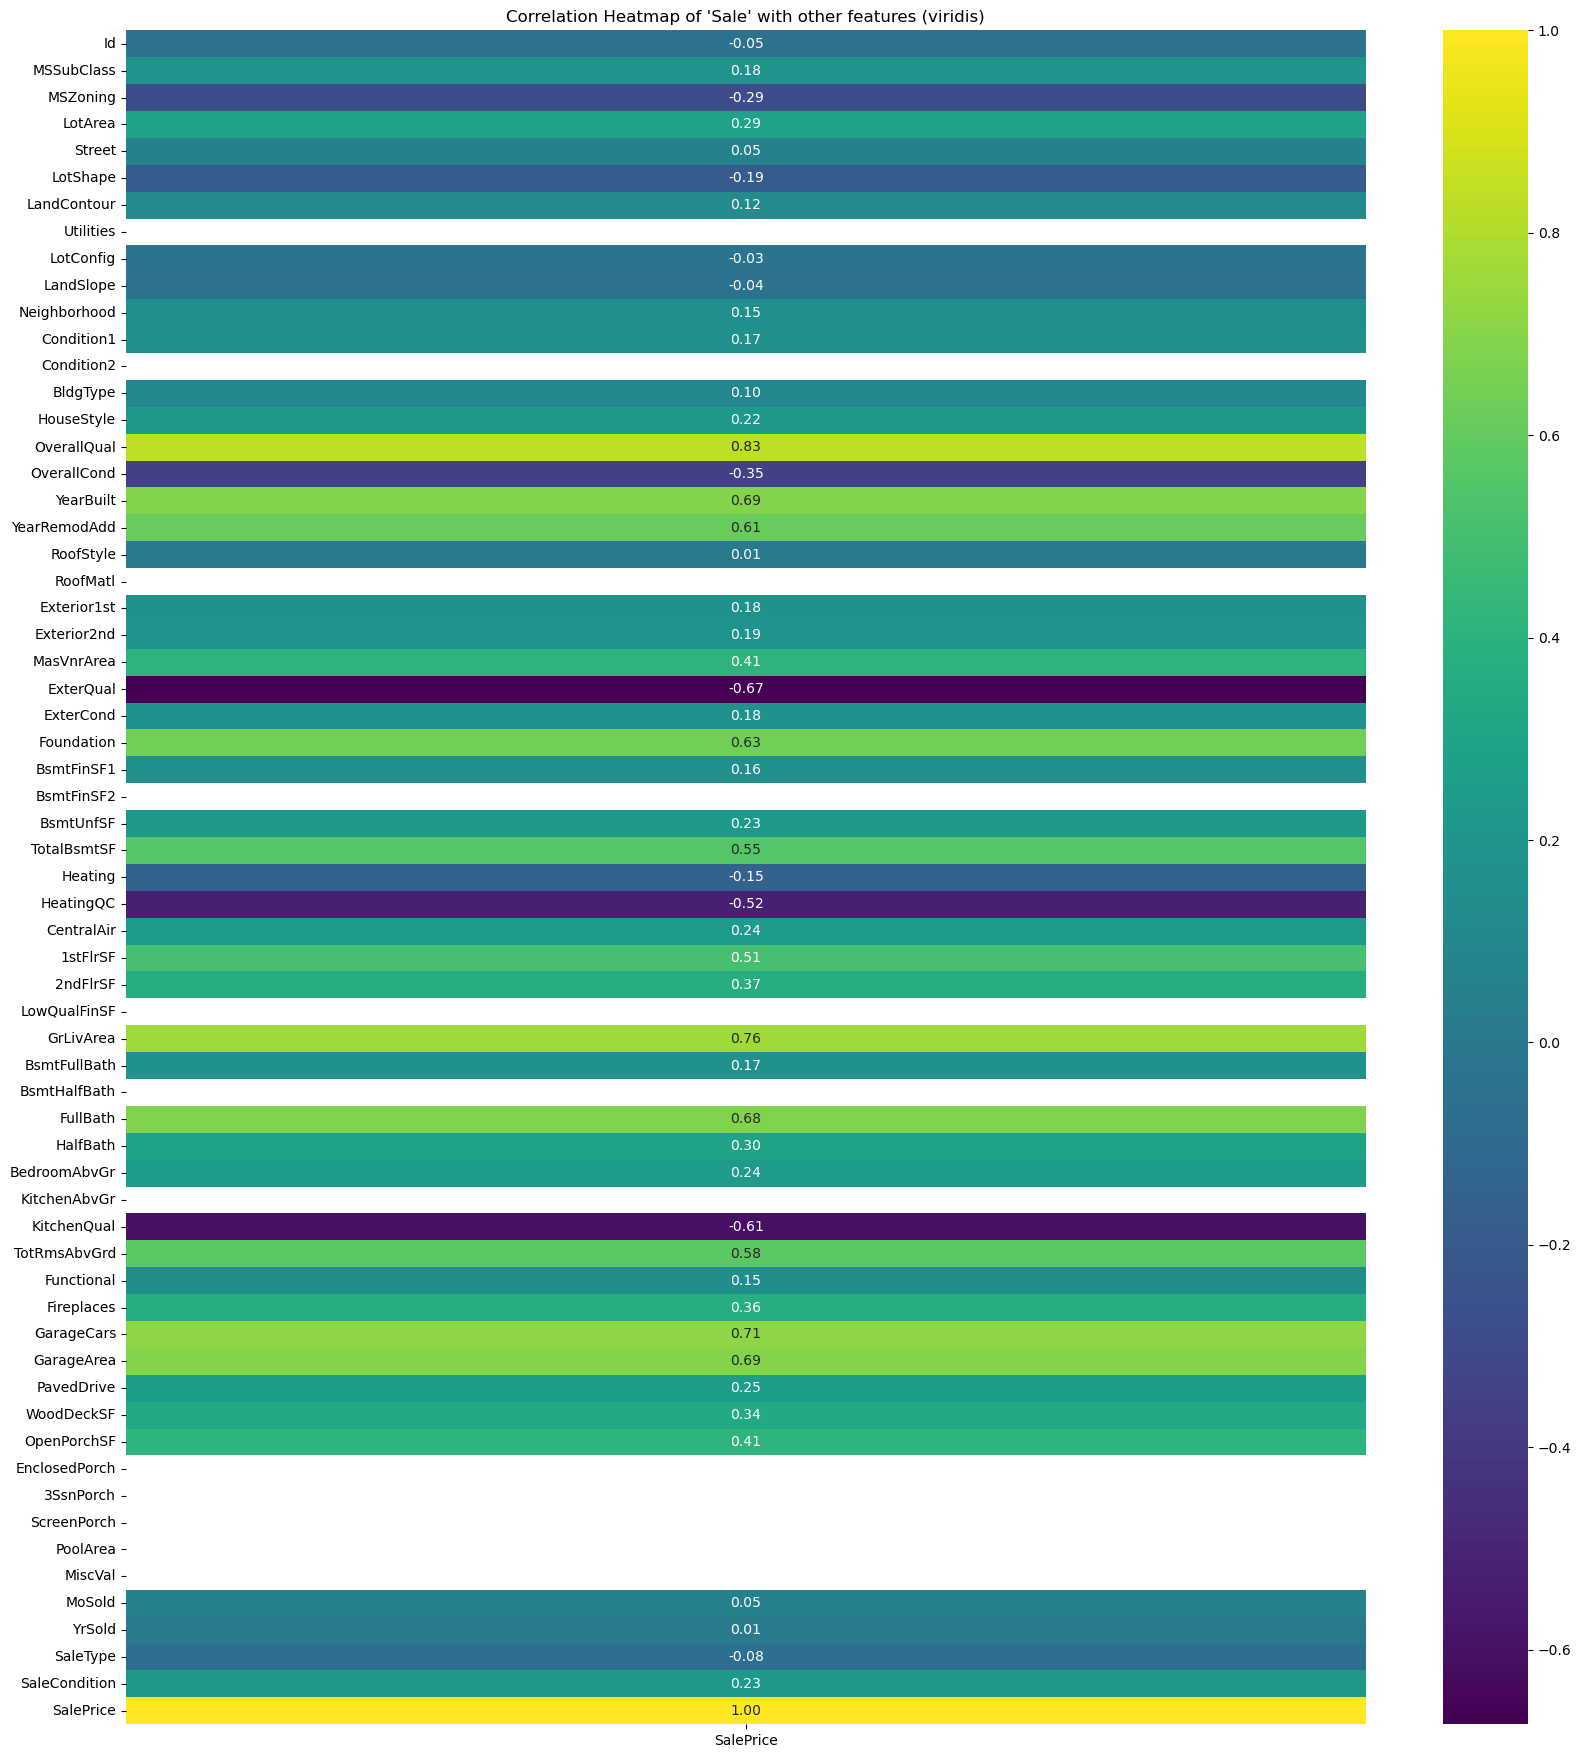

In [148]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 22))
sns.heatmap(correlation_matrix[['SalePrice']], annot=True, cmap='viridis', fmt='.2f')

# Set the title
plt.title("Correlation Heatmap of 'Sale' with other features (viridis)")

# Show the plot
plt.show()

###  Modeling 

In [149]:
x = df.drop('SalePrice', axis=1)
y = df['SalePrice']

### AdaBoost Regression 

In [177]:
# Feature selection with SelectKBest
k_best = SelectKBest(score_func=f_regression, k=12)  # Adjust k as needed
X_selected = k_best.fit_transform(x, y)
# Get indices of selected features
selected_indices = k_best.get_support(indices=True)

# Get names of selected columns (assuming 'x' is a DataFrame)
selected_column_names = x.columns[selected_indices]

print(selected_column_names)

# Splitting the data into training and testing sets with selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Decision Tree Regressor (base model for boosting)
base_model = DecisionTreeRegressor(max_depth=1)

# AdaBoost Regression
ada_model = AdaBoostRegressor(base_estimator=base_model, n_estimators=100, learning_rate=1.0)
ada_model.fit(X_train, y_train)
ada_predictions = ada_model.predict(X_test)

# Evaluation metrics for AdaBoost Regression
mse = mean_squared_error(y_test, ada_predictions)
r_squared = r2_score(y_test, ada_predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r_squared)


Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'Foundation',
       'TotalBsmtSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'GarageCars', 'GarageArea'],
      dtype='object')
Mean Squared Error (MSE): 1398585048.3927112
R-squared (R²): 0.5974645622388923


### Boosting with XGBoost

In [180]:
# Feature selection with SelectKBest
k_best = SelectKBest(score_func=f_regression, k=12)  # Adjust k as needed
X_selected = k_best.fit_transform(x, y)
# Get indices of selected features
selected_indices = k_best.get_support(indices=True)

# Get names of selected columns (assuming 'x' is a DataFrame)
selected_column_names = x.columns[selected_indices]

print(selected_column_names)

# Splitting the data into training and testing sets with selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)



# Gradient Boosting with XGBoost
xgb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Evaluation metrics for Boosting with XGBoost
mse = mean_squared_error(y_test, xgb_predictions)
r_squared = r2_score(y_test, xgb_predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r_squared)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'Foundation',
       'TotalBsmtSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'GarageCars', 'GarageArea'],
      dtype='object')
Mean Squared Error (MSE): 283610058.2997621
R-squared (R²): 0.918372429976749


### Bagging using Random Forest Regression

In [181]:
# Feature selection with SelectKBest
k_best = SelectKBest(score_func=f_regression, k=12)  # Adjust k as needed
X_selected = k_best.fit_transform(x, y)
# Get indices of selected features
selected_indices = k_best.get_support(indices=True)

# Get names of selected columns (assuming 'x' is a DataFrame)
selected_column_names = x.columns[selected_indices]

print(selected_column_names)

# Splitting the data into training and testing sets with selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Random Forest Regression (Bagging)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluation metrics for Random Forest Regression
mse = mean_squared_error(y_test, rf_predictions)
r_squared = r2_score(y_test, rf_predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r_squared)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'Foundation',
       'TotalBsmtSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'GarageCars', 'GarageArea'],
      dtype='object')
Mean Squared Error (MSE): 375804248.9145912
R-squared (R²): 0.8918374481243256


### Testing the Model

In [190]:
test_df = pd.read_csv('test.csv')

In [191]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [192]:
colum_to_retain=['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'Foundation',
       'TotalBsmtSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'GarageCars', 'GarageArea']


In [193]:
test_df=test_df[colum_to_retain]

In [194]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   ExterQual     1459 non-null   object 
 4   Foundation    1459 non-null   object 
 5   TotalBsmtSF   1458 non-null   float64
 6   GrLivArea     1459 non-null   int64  
 7   FullBath      1459 non-null   int64  
 8   KitchenQual   1458 non-null   object 
 9   TotRmsAbvGrd  1459 non-null   int64  
 10  GarageCars    1458 non-null   float64
 11  GarageArea    1458 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 136.9+ KB


In [195]:
test_df.isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
ExterQual       0
Foundation      0
TotalBsmtSF     1
GrLivArea       0
FullBath        0
KitchenQual     1
TotRmsAbvGrd    0
GarageCars      1
GarageArea      1
dtype: int64

In [196]:
# Drop rows with any null values
test_df.dropna(axis=0, inplace=True)

In [197]:
test_df.isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
ExterQual       0
Foundation      0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
KitchenQual     0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
dtype: int64

In [198]:
# Select numerical columns (integers or floats)
numeric_columns = test_df.select_dtypes(include=['int', 'float']).columns.tolist()

scaler = StandardScaler()

# Standardize numerical columns excluding 'SalesPrice'
for column in numeric_columns:
    test_df[[column]] = scaler.fit_transform(test_df[[column]])
test_df

OverallQual  YearBuilt  YearRemodAdd ExterQual Foundation  TotalBsmtSF  \
0       -0.753186  -0.344247     -1.075540        TA     CBlock    -0.371376   
1       -0.056907  -0.443115     -1.217691        TA     CBlock     0.637825   
2       -0.753186   0.842160      0.677659        TA      PConc    -0.267521   
3       -0.056907   0.875116      0.677659        TA      PConc    -0.272037   
4        1.335650   0.677381      0.393357        Gd      PConc     0.527196   
5       -0.056907   0.710337      0.488124        TA      PConc    -0.640045   
6       -0.056907   0.677381      1.104113        TA      PConc     0.274332   
7       -0.056907   0.875116      0.677659        TA      PConc    -0.581345   
8        0.639371   0.611470      0.298589        TA      PConc     0.572351   
9       -1.449465  -0.047646     -0.649086        TA     CBlock    -0.371376   
10       0.639371   0.908072      0.725043        Gd      PConc     0.809412   
11      -0.056907  -0.014690     -0.601702        TA     CBlock    -1.272207   
12      -0.753186  -0.014690     -0.601702        TA     CBlock    -1.177383   
13      -0.056907   0.117133     -0.412167        TA     CBlock    -0.432335   
14       0.639371   0.117133     -0.412167        TA     CBlock    -0.475232   
15       2.031929   1.237629      1.246264        Ex      PConc     1.227090   
16       1.335650   1.237629      1.246264        Gd      PConc     1.123235   
17       2.031929   1.105806      1.009346        Gd      PConc     1.470924   
18       1.335650   1.105806      1.056729        Gd      PConc     1.750881   
19       2.031929   1.039895      0.961962        Ex      PConc     4.062788   
20       1.335650   1.006939      0.867194        Gd      PConc     1.409965   
21       1.335650   1.138762      1.056729        Gd      PConc     0.730391   
22      -0.056907   1.105806      1.009346        Gd      PConc     0.626536   
23       0.639371   1.138762      1.056729        Gd      PConc     0.222404   
24       0.639371   1.072851      0.961962        Gd      PConc    -1.495722   
25       0.639371   1.072851      0.961962        Gd      PConc    -0.450397   
26       1.335650   0.875116      0.677659        Gd      PConc     1.315141   
27       1.335650   1.105806      1.056729        Gd      PConc     1.238379   
28       0.639371   1.237629      1.246264        Gd      PConc     0.387218   
29      -0.056907   1.105806      1.009346        Gd      PConc     0.951648   
30       0.639371   1.072851      0.961962        Gd      PConc    -0.486520   
31      -0.753186  -1.695434     -1.596761        TA     BrkTil    -0.520386   
32      -0.056907   0.084178      0.867194        TA     CBlock     0.364641   
33       1.335650   0.710337      0.440741        Gd      PConc     0.416568   
34       1.335650   0.677381      0.440741        Gd      PConc     0.775546   
35       0.639371   1.072851      1.009346        Gd      PConc     0.996802   
36       0.639371   1.072851      0.961962        Gd      PConc    -0.466201   
37       0.639371   1.072851      0.961962        Gd      PConc    -1.008054   
38       0.639371   1.072851      1.009346        Gd      PConc    -1.008054   
39      -0.056907   1.105806      1.009346        Gd      PConc    -1.008054   
40      -0.056907   0.941028      0.772427        Gd      PConc    -0.655849   
41       0.639371   1.039895      0.914578        Gd      PConc    -1.166094   
42       1.335650   1.270585      1.246264        Gd      PConc     1.344491   
43       1.335650   0.941028      0.772427        Gd      PConc    -0.161408   
44       0.639371   1.006939      0.867194        Gd      PConc     1.005833   
45      -0.056907  -0.146513     -0.791237        TA     CBlock     1.766685   
46      -0.056907   0.710337      0.440741        TA      PConc     0.527196   
47      -0.056907   0.216001     -0.270016        TA      PConc     0.400764   
48      -0.056907  -0.014690     -0.601702        TA     CBlock    -0.748416   
49    

In [199]:
for column in test_df.columns:
    if test_df[column].dtype == 'object':  # Check if column is categorical (object-type)
        label_encoder = LabelEncoder()
        test_df[column] = label_encoder.fit_transform(test_df[column])


test_df

OverallQual  YearBuilt  YearRemodAdd  ExterQual  Foundation  \
0       -0.753186  -0.344247     -1.075540          3           1   
1       -0.056907  -0.443115     -1.217691          3           1   
2       -0.753186   0.842160      0.677659          3           2   
3       -0.056907   0.875116      0.677659          3           2   
4        1.335650   0.677381      0.393357          2           2   
5       -0.056907   0.710337      0.488124          3           2   
6       -0.056907   0.677381      1.104113          3           2   
7       -0.056907   0.875116      0.677659          3           2   
8        0.639371   0.611470      0.298589          3           2   
9       -1.449465  -0.047646     -0.649086          3           1   
10       0.639371   0.908072      0.725043          2           2   
11      -0.056907  -0.014690     -0.601702          3           1   
12      -0.753186  -0.014690     -0.601702          3           1   
13      -0.056907   0.117133     -0.412167          3           1   
14       0.639371   0.117133     -0.412167          3           1   
15       2.031929   1.237629      1.246264          0           2   
16       1.335650   1.237629      1.246264          2           2   
17       2.031929   1.105806      1.009346          2           2   
18       1.335650   1.105806      1.056729          2           2   
19       2.031929   1.039895      0.961962          0           2   
20       1.335650   1.006939      0.867194          2           2   
21       1.335650   1.138762      1.056729          2           2   
22      -0.056907   1.105806      1.009346          2           2   
23       0.639371   1.138762      1.056729          2           2   
24       0.639371   1.072851      0.961962          2           2   
25       0.639371   1.072851      0.961962          2           2   
26       1.335650   0.875116      0.677659          2           2   
27       1.335650   1.105806      1.056729          2           2   
28       0.639371   1.237629      1.246264          2           2   
29      -0.056907   1.105806      1.009346          2           2   
30       0.639371   1.072851      0.961962          2           2   
31      -0.753186  -1.695434     -1.596761          3           0   
32      -0.056907   0.084178      0.867194          3           1   
33       1.335650   0.710337      0.440741          2           2   
34       1.335650   0.677381      0.440741          2           2   
35       0.639371   1.072851      1.009346          2           2   
36       0.639371   1.072851      0.961962          2           2   
37       0.639371   1.072851      0.961962          2           2   
38       0.639371   1.072851      1.009346          2           2   
39      -0.056907   1.105806      1.009346          2           2   
40      -0.056907   0.941028      0.772427          2           2   
41       0.639371   1.039895      0.914578          2           2   
42       1.335650   1.270585      1.246264          2           2   
43       1.335650   0.941028      0.772427          2           2   
44       0.639371   1.006939      0.867194          2           2   
45      -0.056907  -0.146513     -0.791237          3           1   
46      -0.056907   0.710337      0.440741          3           2   
47      -0.056907   0.216001     -0.270016          3           2   
48      -0.056907  -0.014690     -0.601702          3           1   
49      -0.753186  -0.179469     -0.838621          3           1   
50      -0.753186  -0.179469     -0.838621          3           2   
51      -0.753186  -0.146513     -0.791237          3           1   
52      -0.056907  -0.245380     -0.933388          3           1   
53      -0.753186  -0.311292      0.819811          3           1   
54      -0.753186  -0.640849      0.867194          2           1   
55      -0.056907  -0.739717     -1.596761          3           1   
56      -0.056907  -0.179469      1.151497          3           1   
57  

### combining all model predection value for input data set 

In [205]:
random_indices = np.random.choice(test_df.index, size=10, replace=False)
selected_data = test_df.loc[random_indices]

# Get input values for the selected rows
input_values = selected_data  # Assuming input values are already in selected_data

# Make predictions using the models
rf_predictions = rf_model.predict(input_values)
xgb_predictions = xgb_model.predict(input_values)
ada_predictions = ada_model.predict(input_values)

# Combine input values and predictions into a DataFrame
predictions_data = {col: input_values[col] for col in test_df.columns}
predictions_data['RF_Predictions'] = rf_predictions
predictions_data['XGB_Predictions'] = xgb_predictions
predictions_data['ADA_Predictions'] = ada_predictions

predictions_df = pd.DataFrame(predictions_data)

predictions_df

OverallQual  YearBuilt  YearRemodAdd  ExterQual  Foundation  \
1082    -0.753186  -0.146513     -0.791237          3           1   
968     -0.753186  -0.344247     -1.075540          3           1   
512      1.335650   1.171718      1.104113          0           2   
1025    -0.753186  -0.509026      0.677659          3           1   
669     -0.056907  -0.640849     -1.501994          3           1   
752     -0.753186  -1.365876     -1.596761          3           1   
1376    -0.056907  -0.113557     -0.743853          3           1   
1458     0.639371   0.710337      0.488124          3           2   
1257     1.335650   0.973983      0.867194          2           2   
219      2.031929   1.204674      1.198881          0           2   

      TotalBsmtSF  GrLivArea  FullBath  KitchenQual  TotRmsAbvGrd  GarageCars  \
1082    -0.249460  -1.133618 -1.029501            3     -1.582537   -0.989015   
968     -0.285583  -1.232480 -1.029501            3     -0.919656   -0.989015   
512     -0.222367   1.239086  0.772126            2      2.394748    1.589330   
1025     0.436888  -0.229436 -1.029501            3     -0.256775   -0.989015   
669     -0.628757   0.102166 -1.029501            3      0.406106   -0.989015   
752     -0.601664  -0.589873 -1.029501            3      0.406106   -2.278188   
1376     0.771030  -0.202661  0.772126            3     -0.256775    0.300158   
1458    -0.113996   1.057838  0.772126            3      1.731867    1.589330   
1257     1.177420   0.168074  0.772126            2     -0.256775    0.300158   
219      1.890860   0.818920  0.772126            0     -0.256775    0.300158   

      GarageArea  RF_Predictions  XGB_Predictions  ADA_Predictions  
1082   -0.410745   124232.717502    117012.745714    118736.876289  
968    -1.074559   121402.691448    115219.467735    118736.876289  
512     0.843124   256483.434121    266862.364512    256307.344444  
1025   -0.691944   145306.007327    141347.594499    120511.275229  
669    -0.761091   141742.480955    151174.550792    130240.224670  
752    -2.180914   108432.594869    110348.582693    118736.876289  
1376    0.225409   164509.400967    151925.881900    125223.976608  
1458    0.815465   236558.112649    245227.597783    240143.507987  
1257    0.419021   240755.713845    238181.831915    247545.680412  
219     0.810856   297606.532096    314562.619962    257914.058608

### Conclusion

#### based on the MSE and r2 score RandomForest and XGB boot performs much better compred to ADA boost and I have taken only 12 input column to validate as i feel remaning column does not contirbute in predicting sales price i have used selectKbest to find top 12 columns which contibutes in predicting sales price